/tmp/ipykernel_1624603/1024727150.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=figsize)


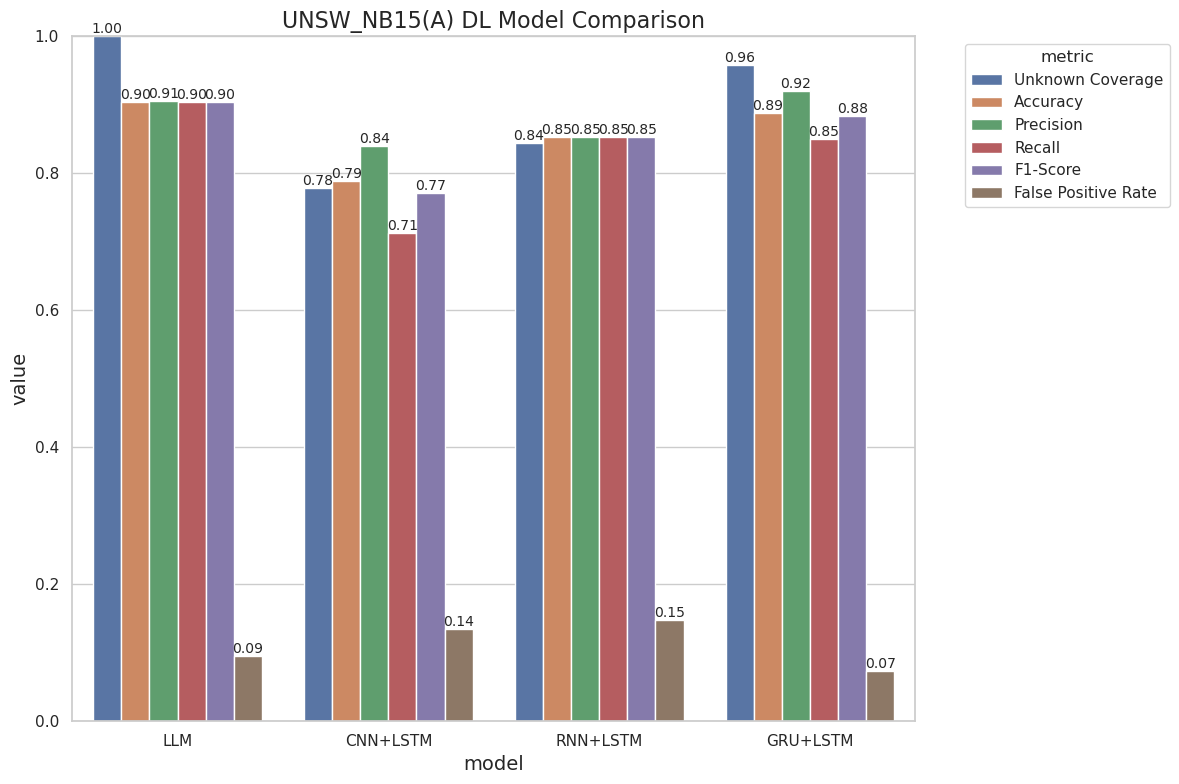

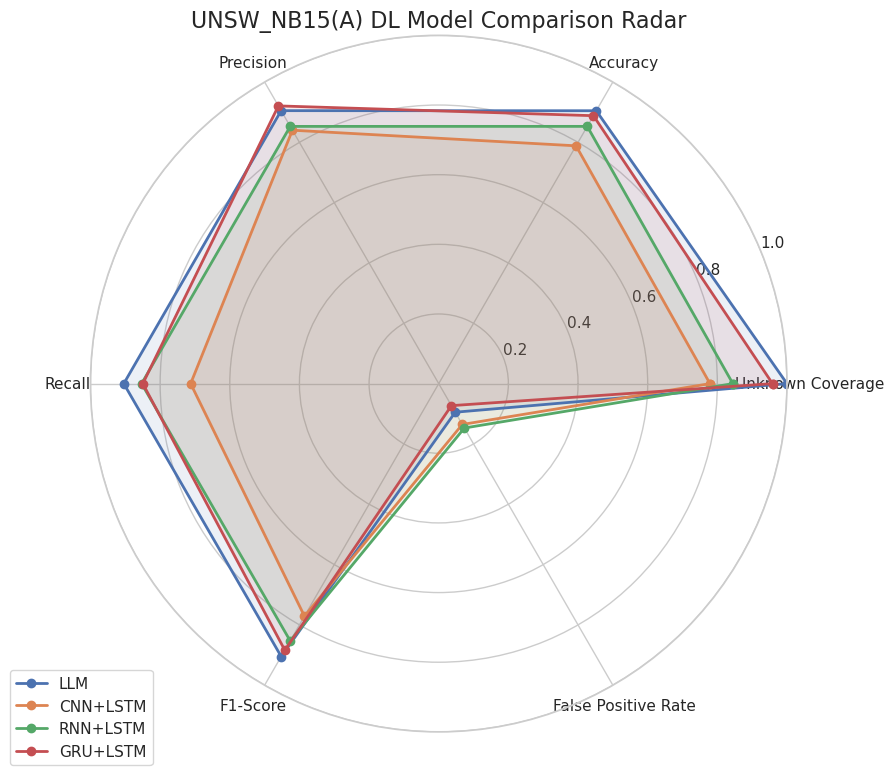

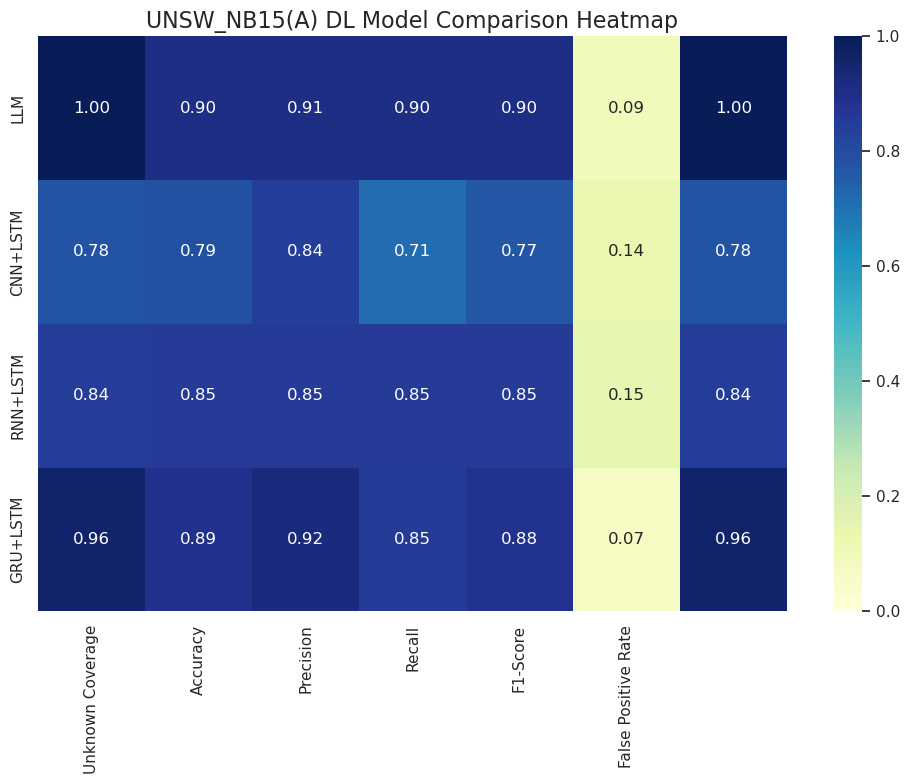

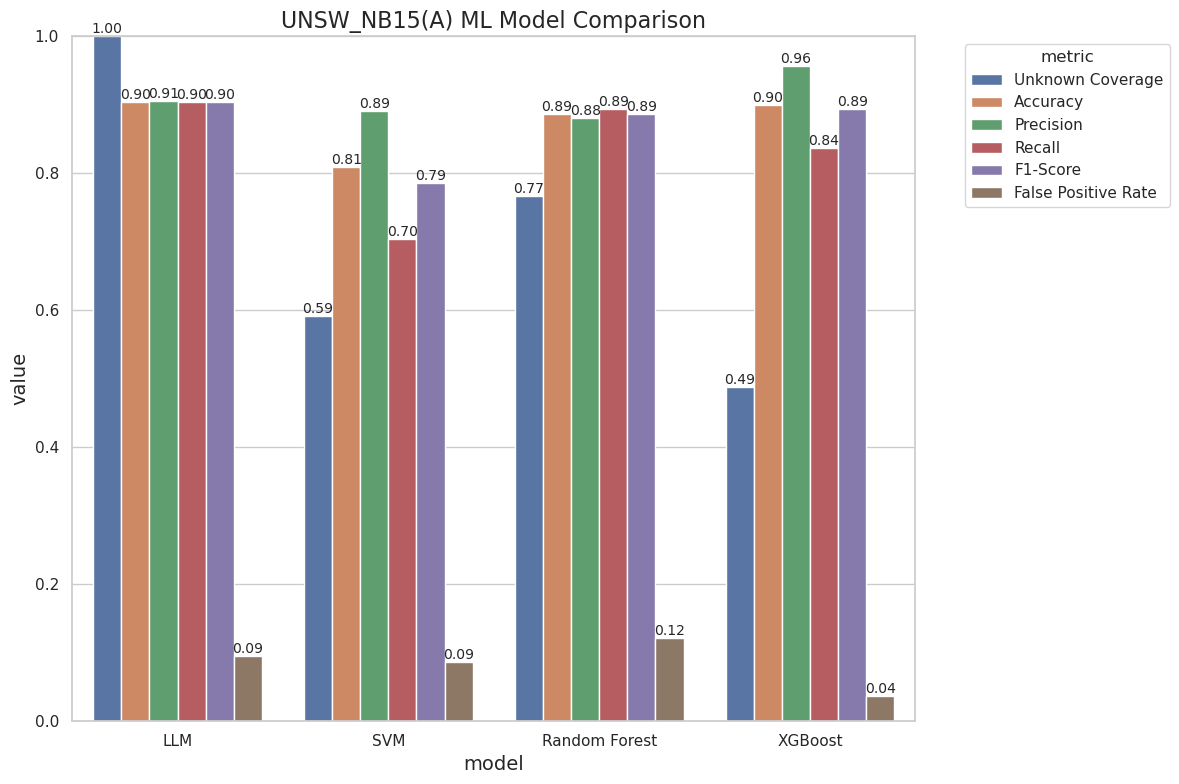

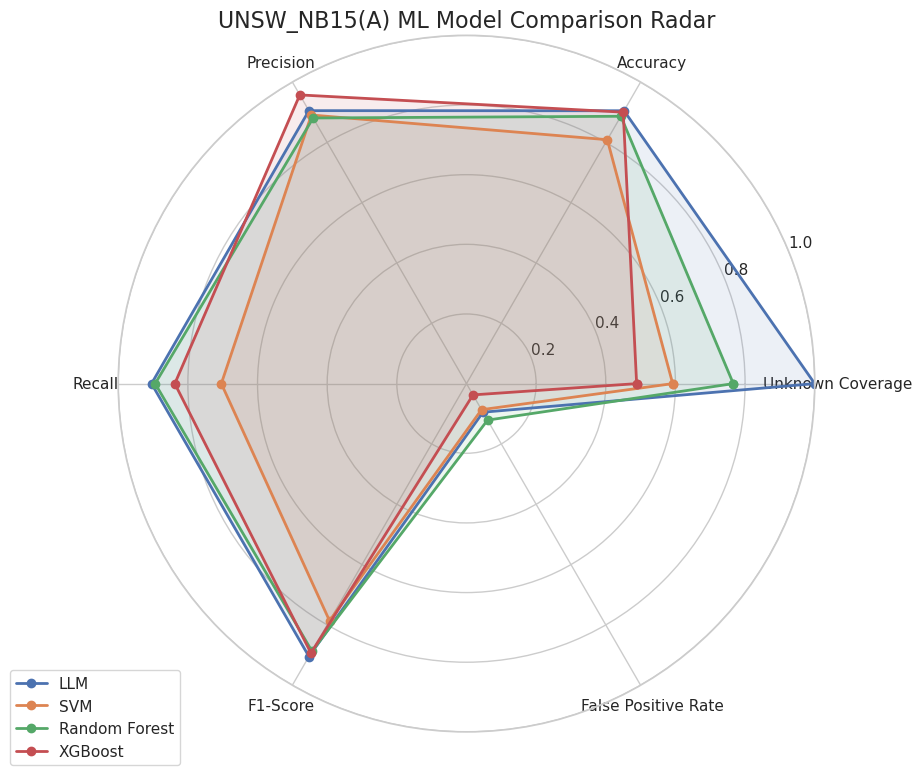

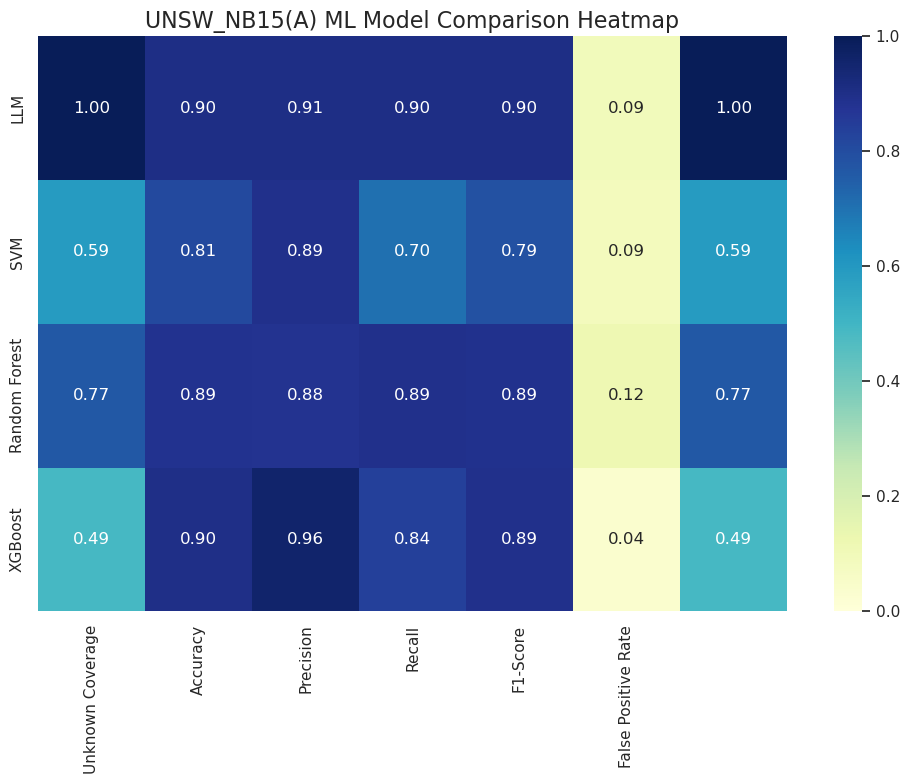

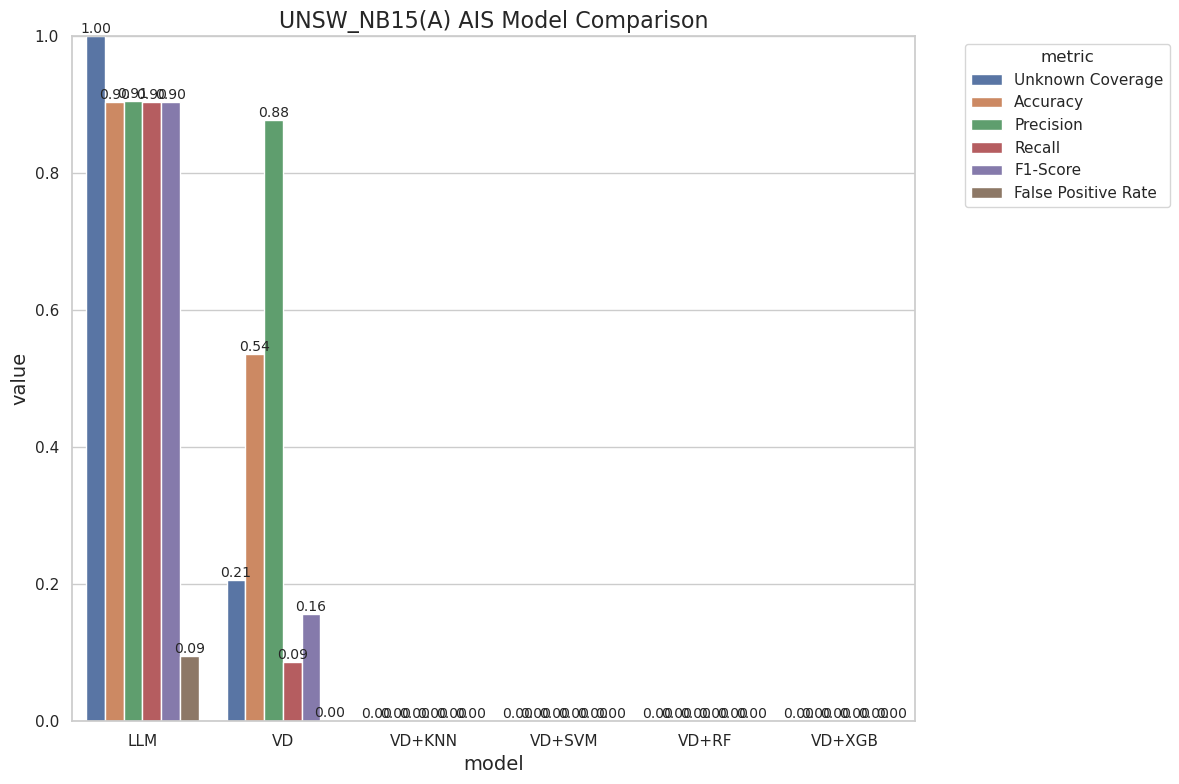

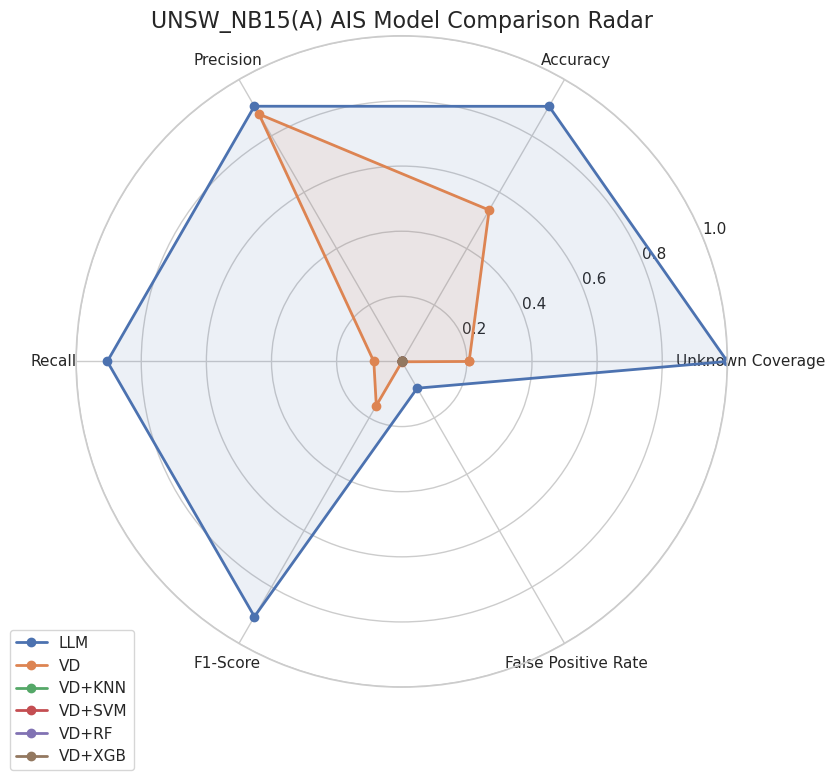

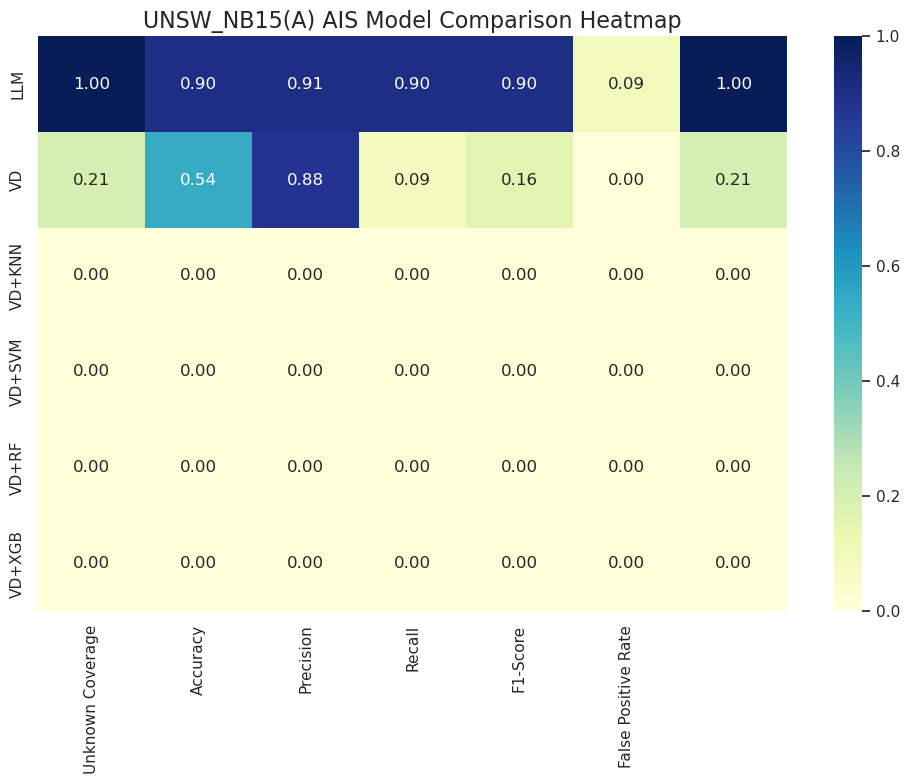

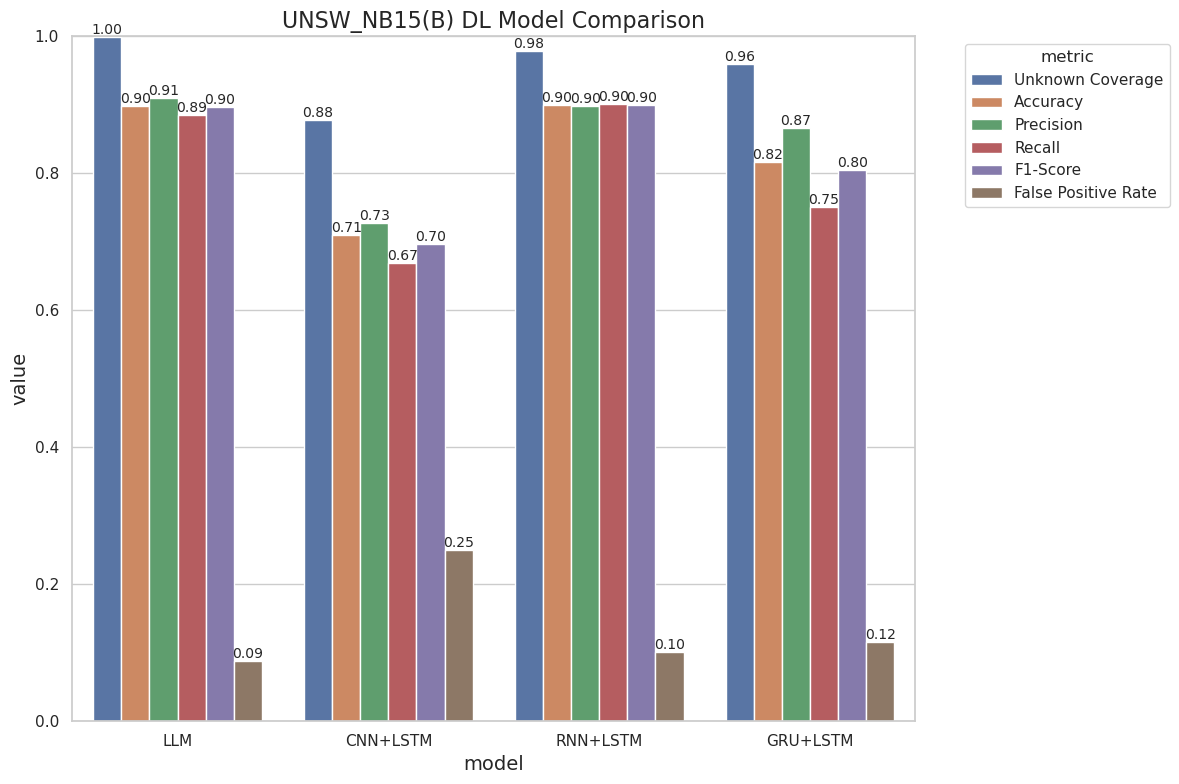

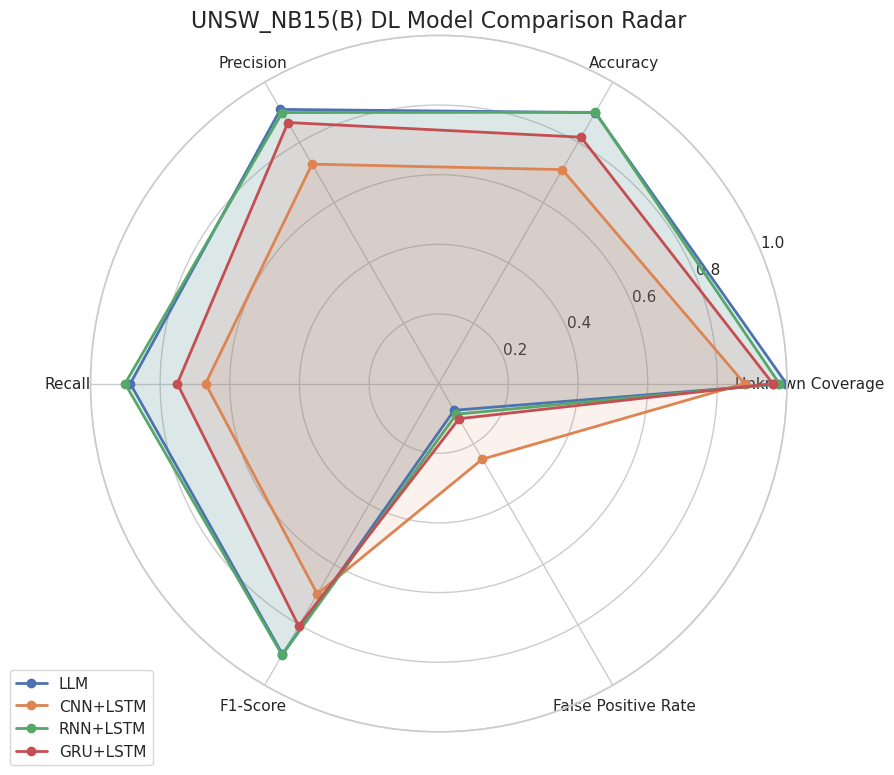

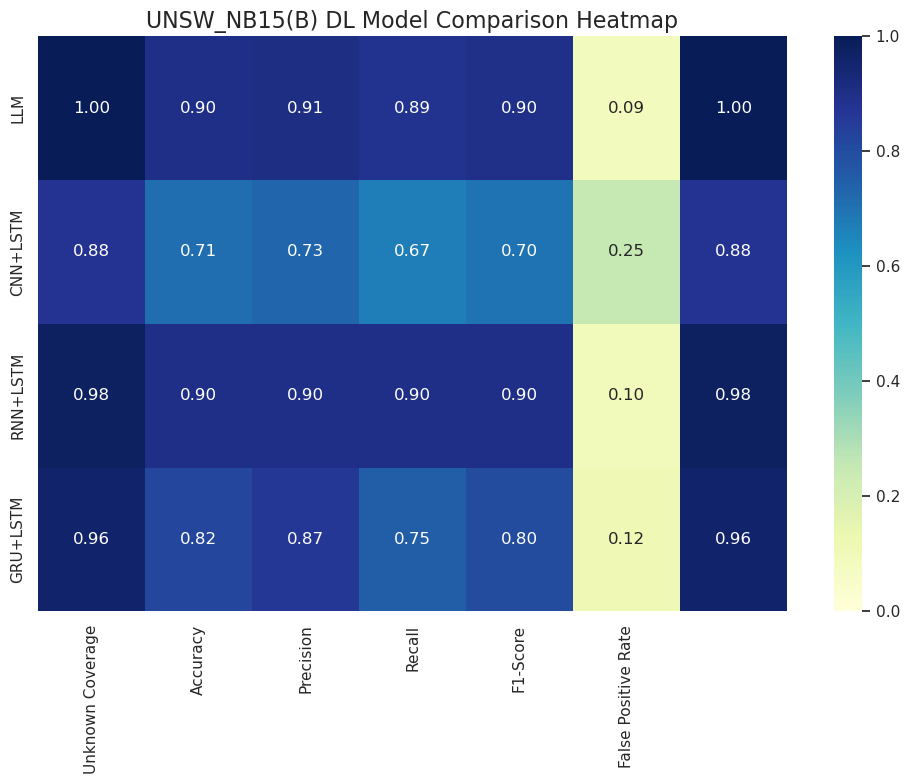

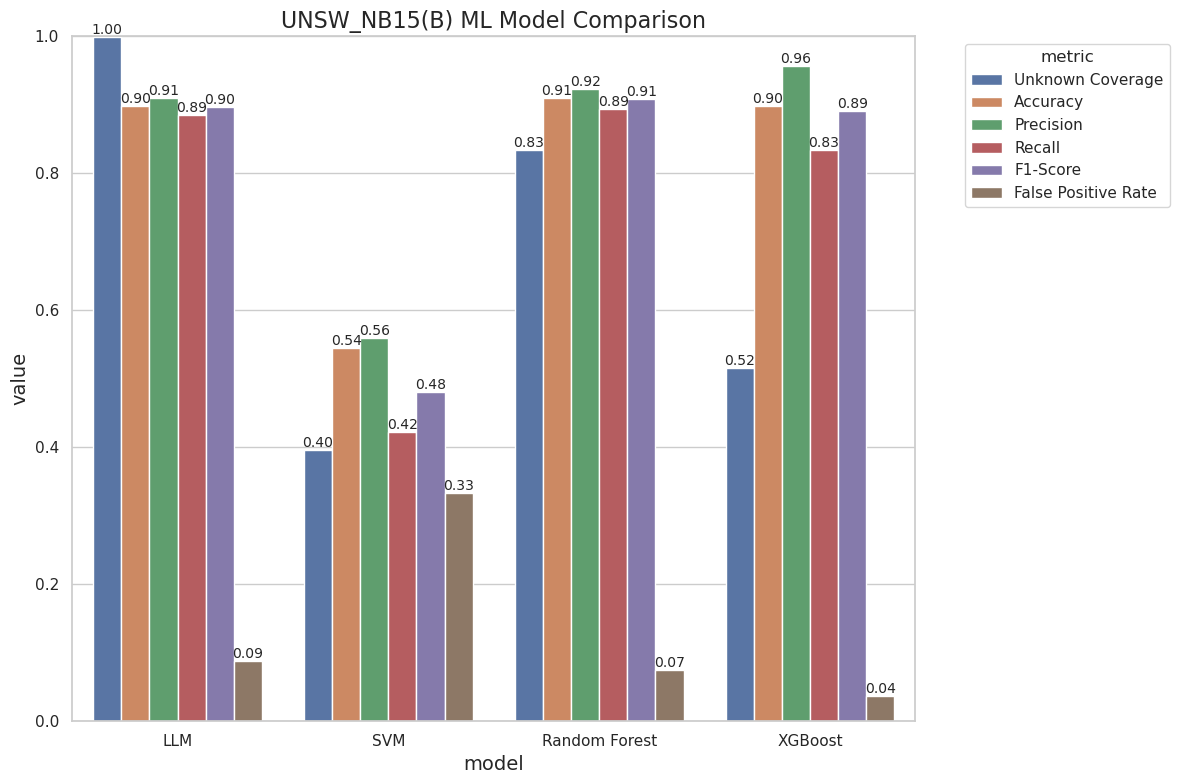

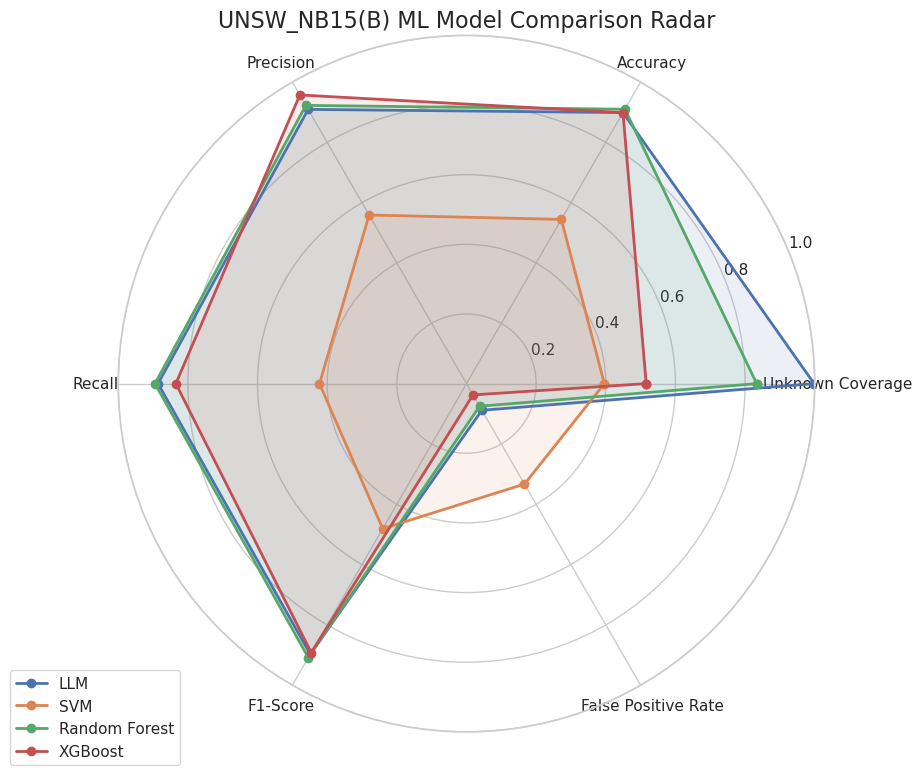

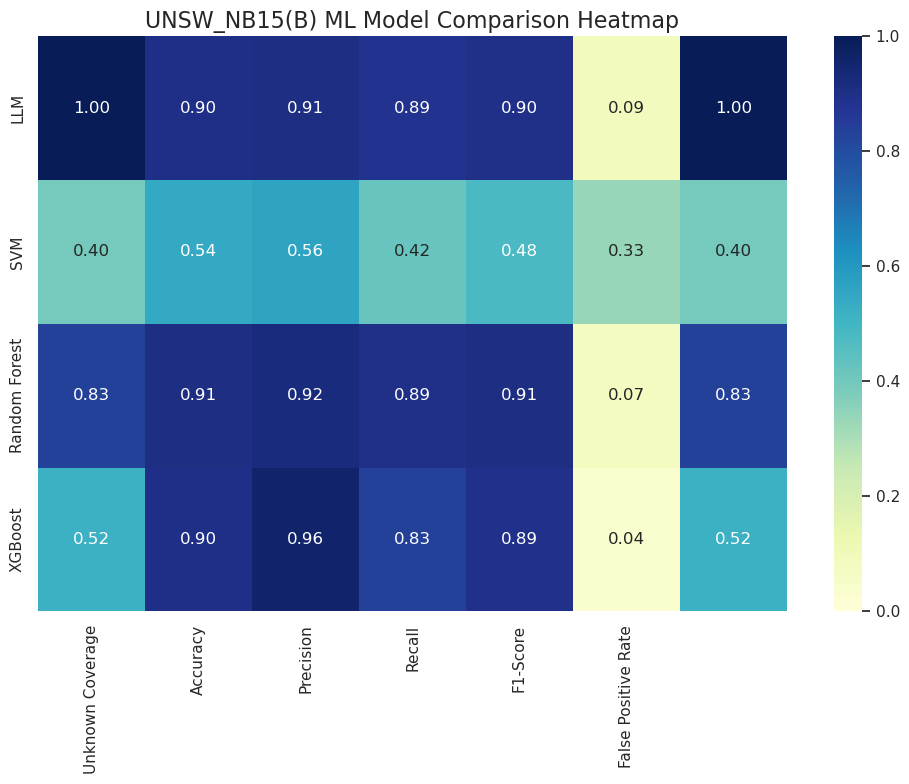

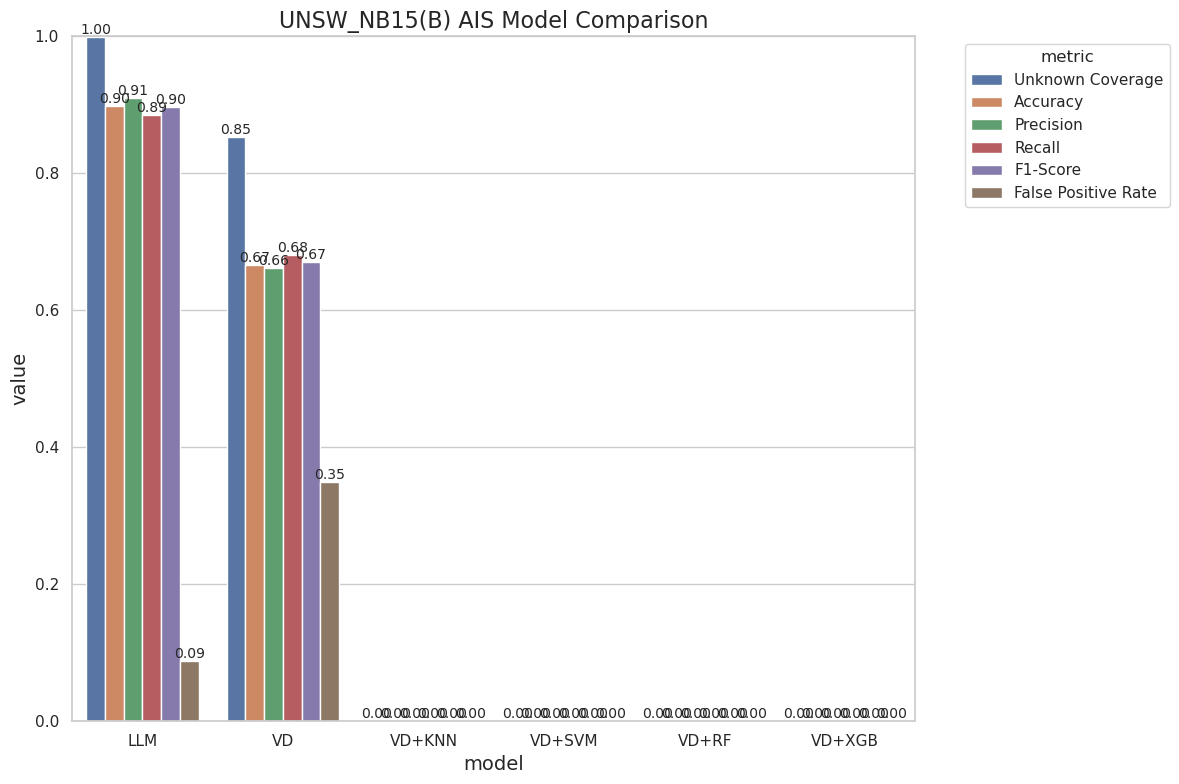

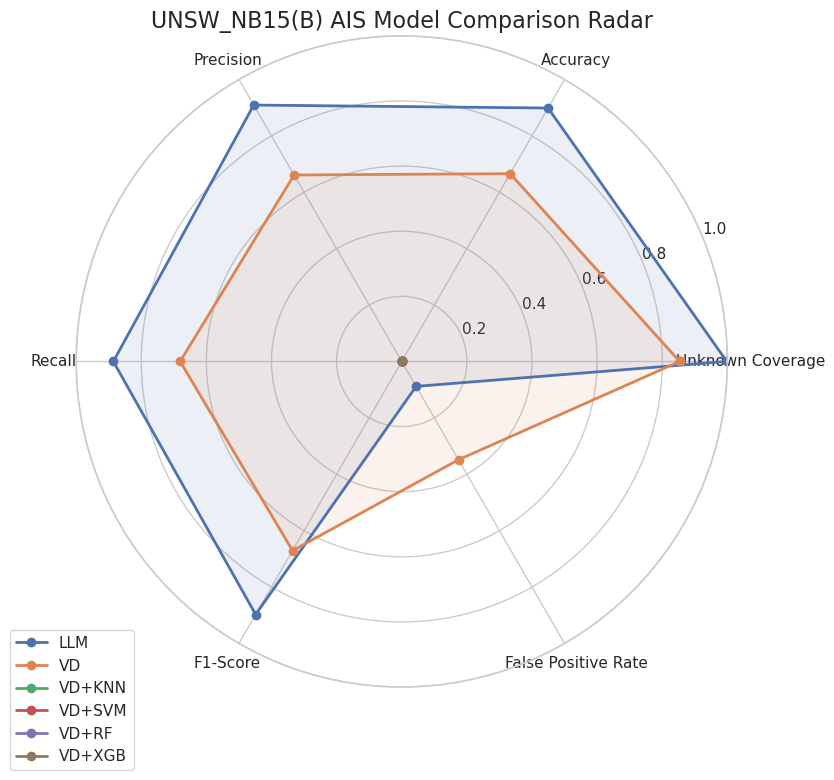

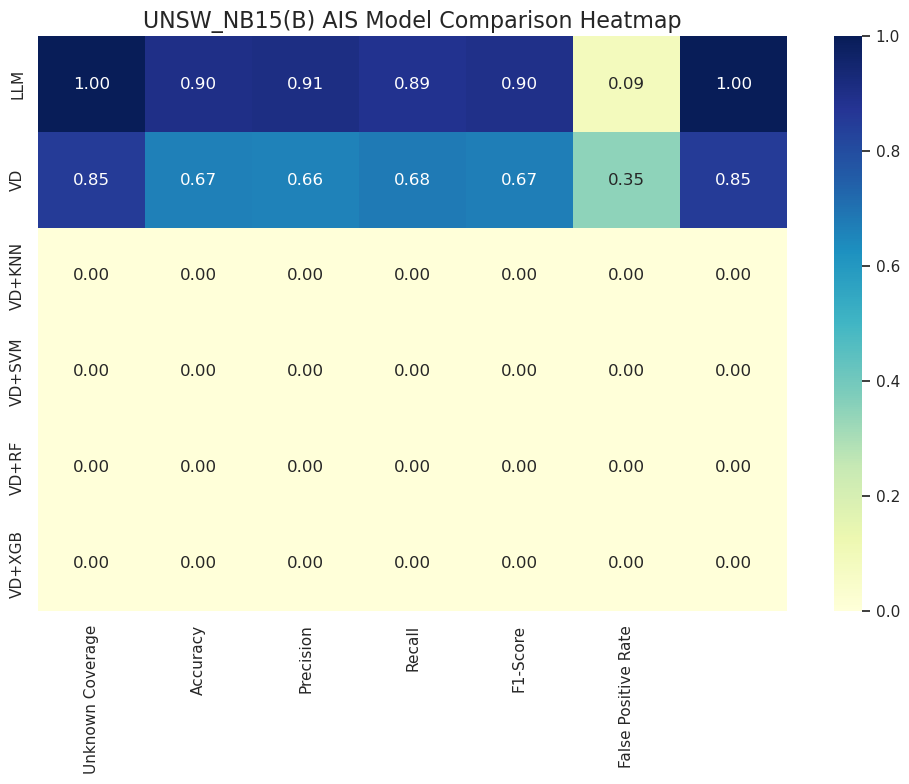

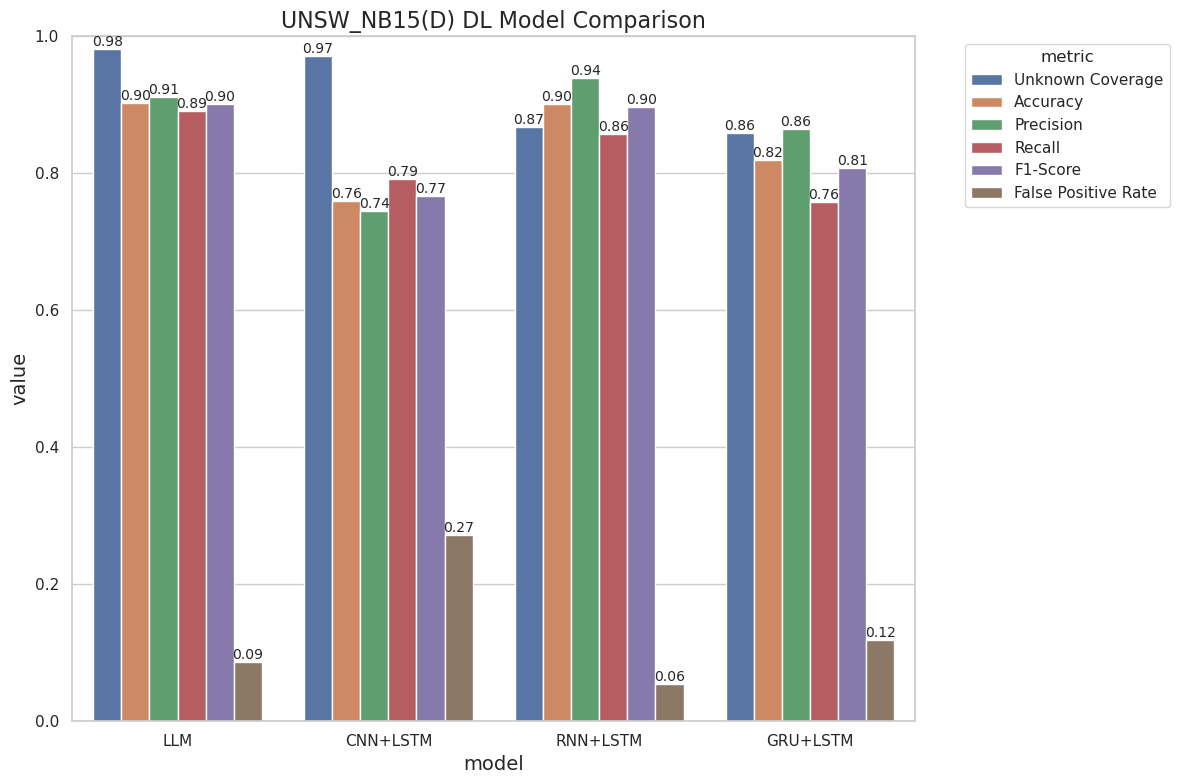

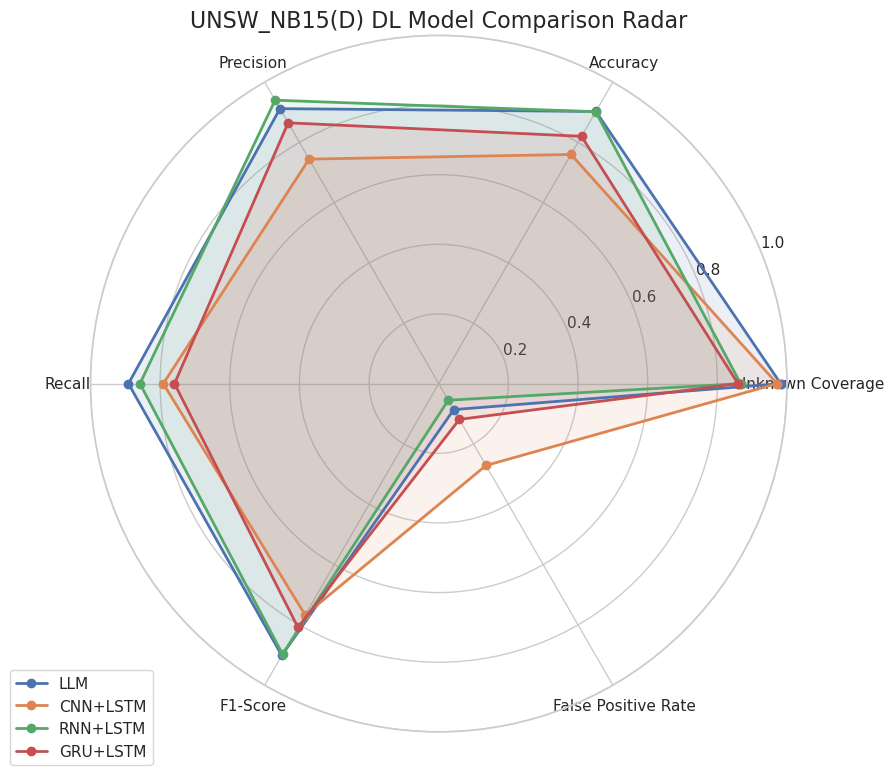

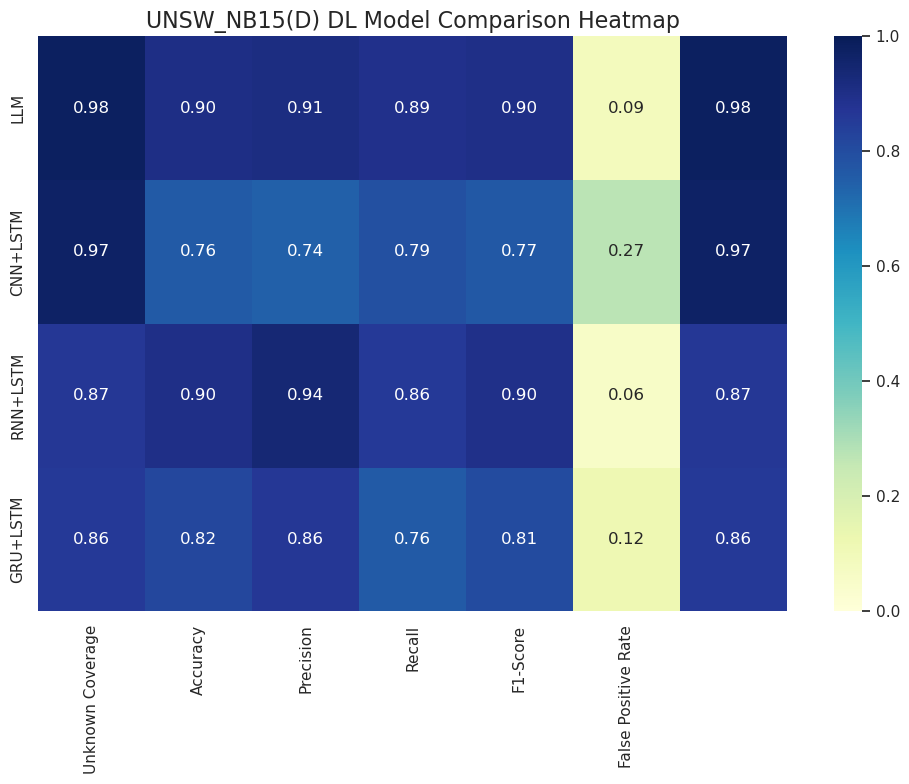

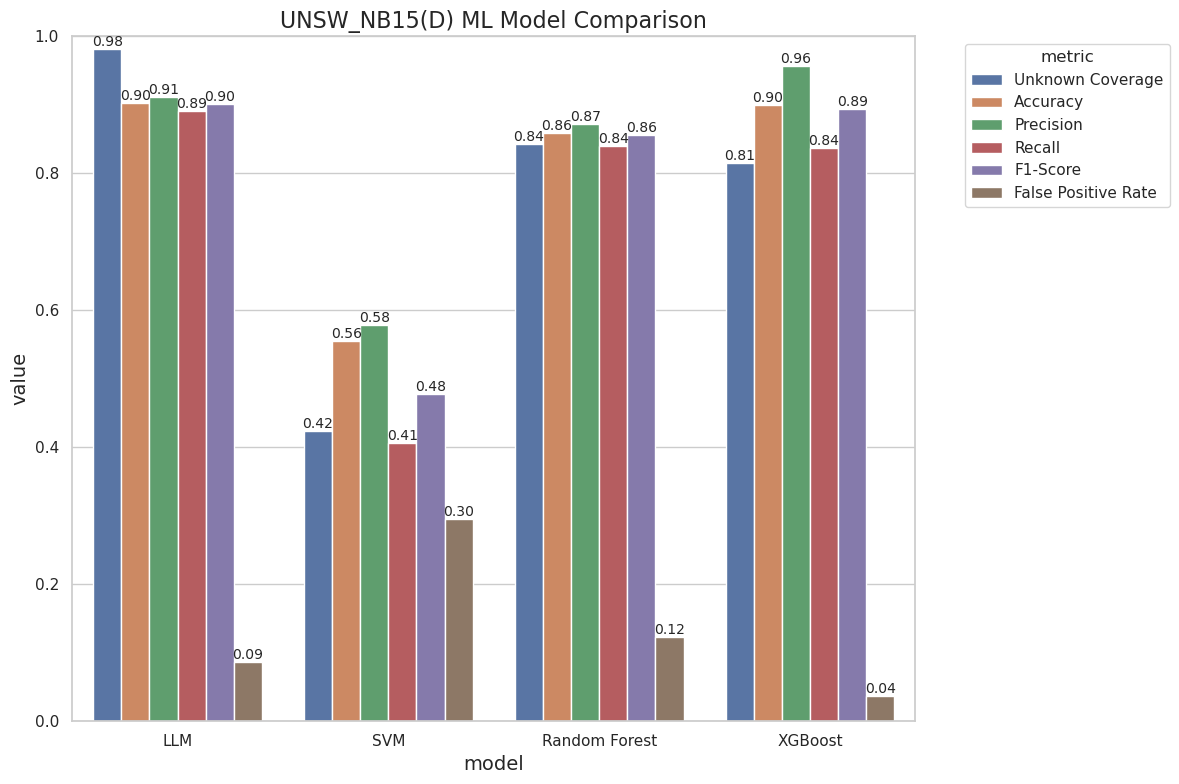

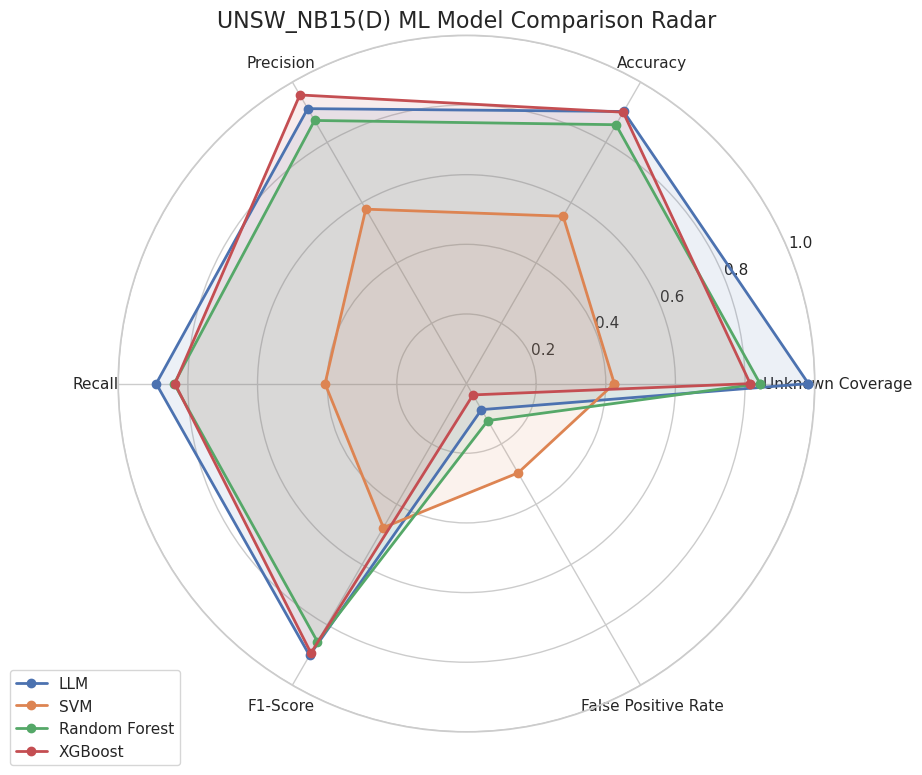

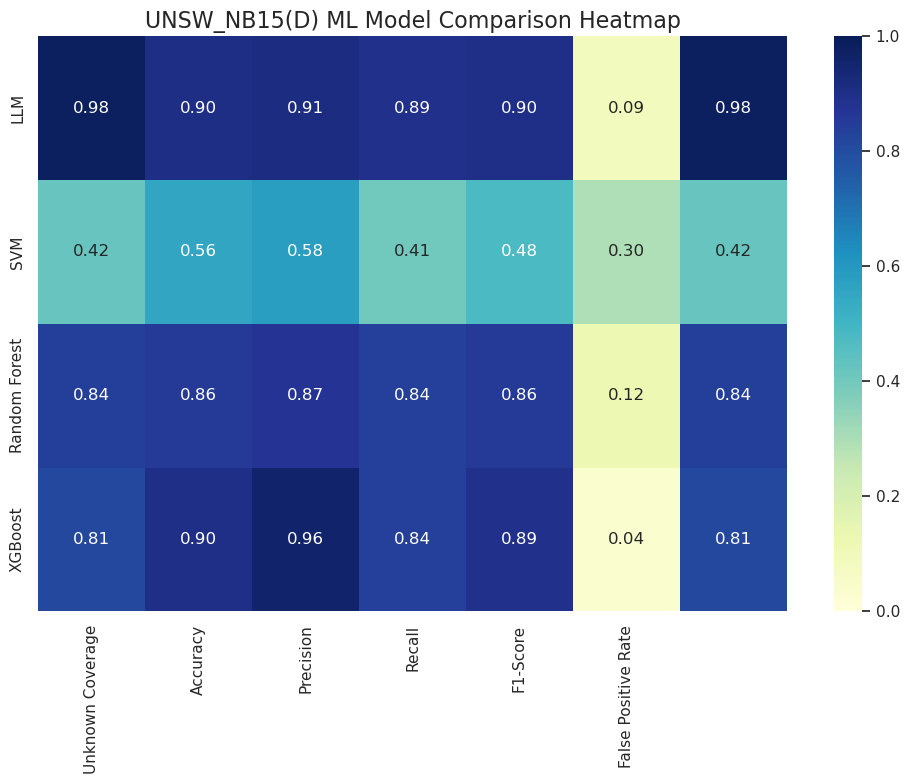

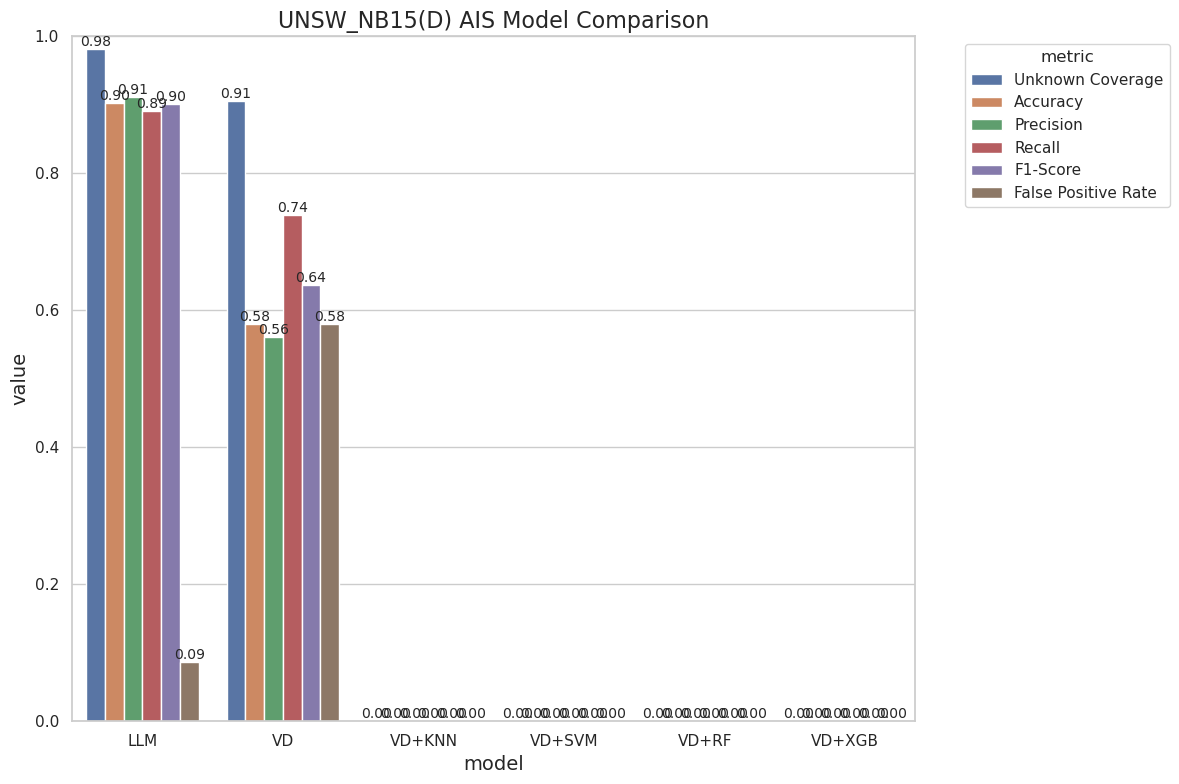

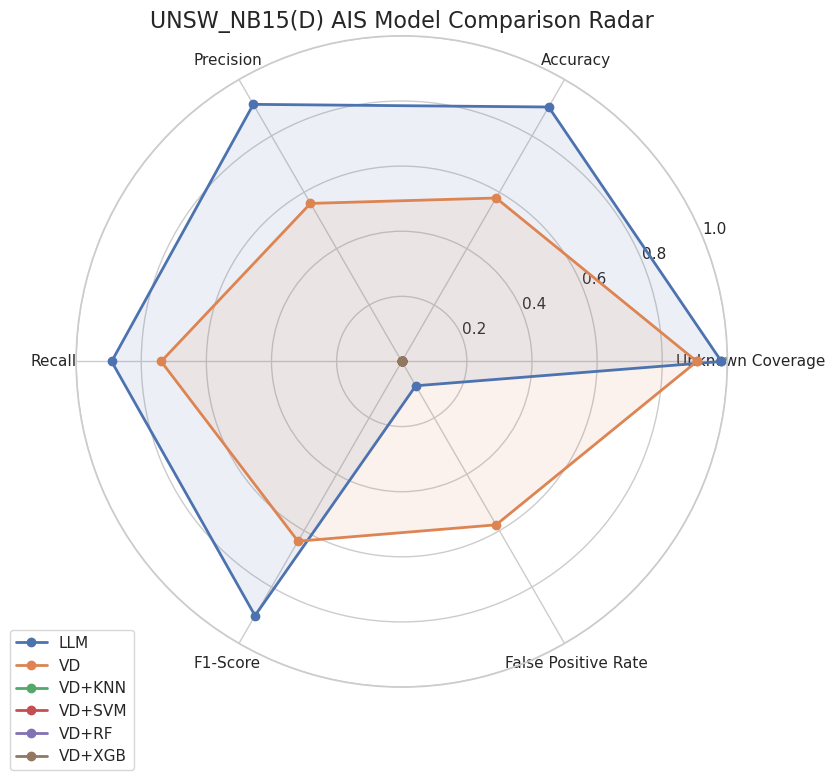

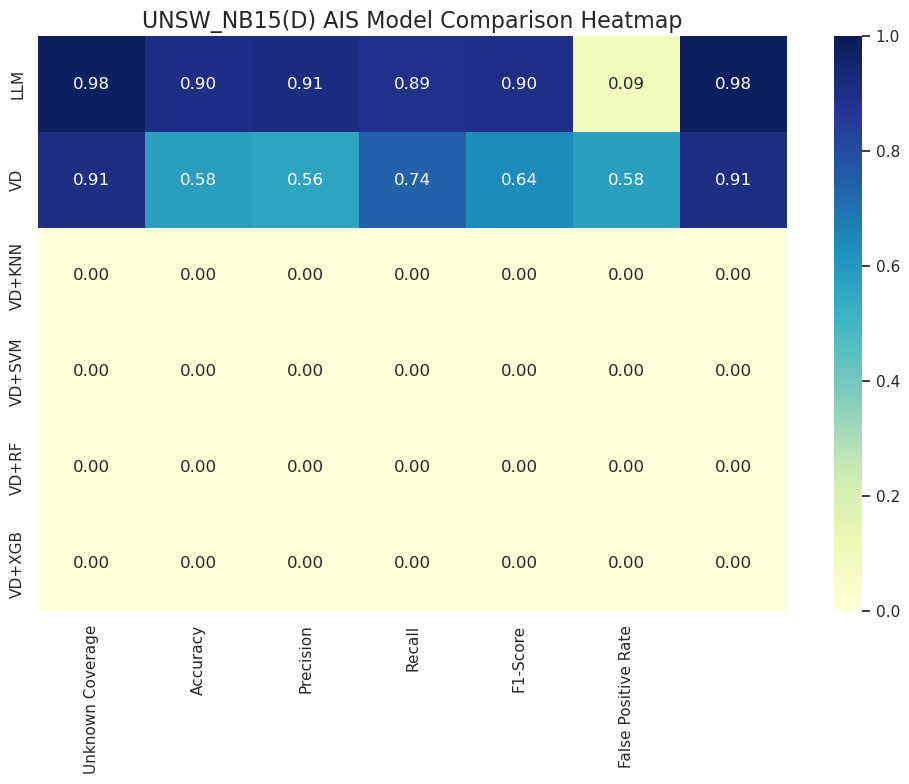

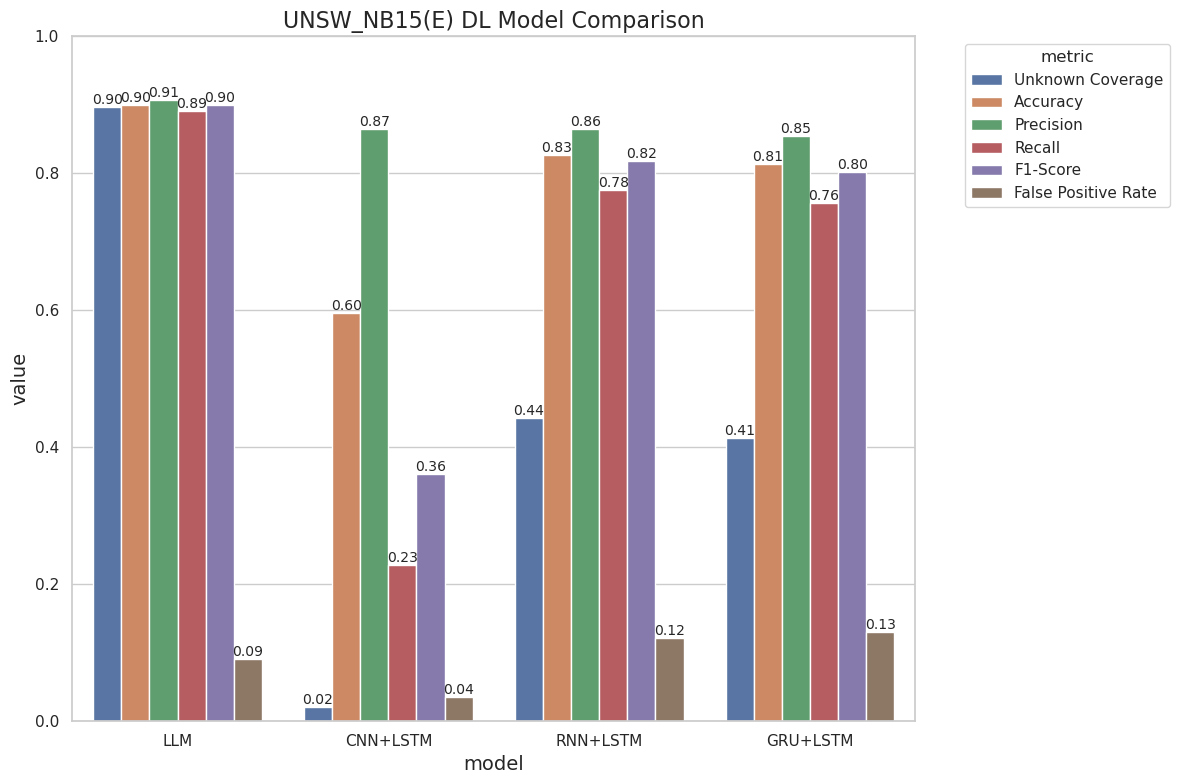

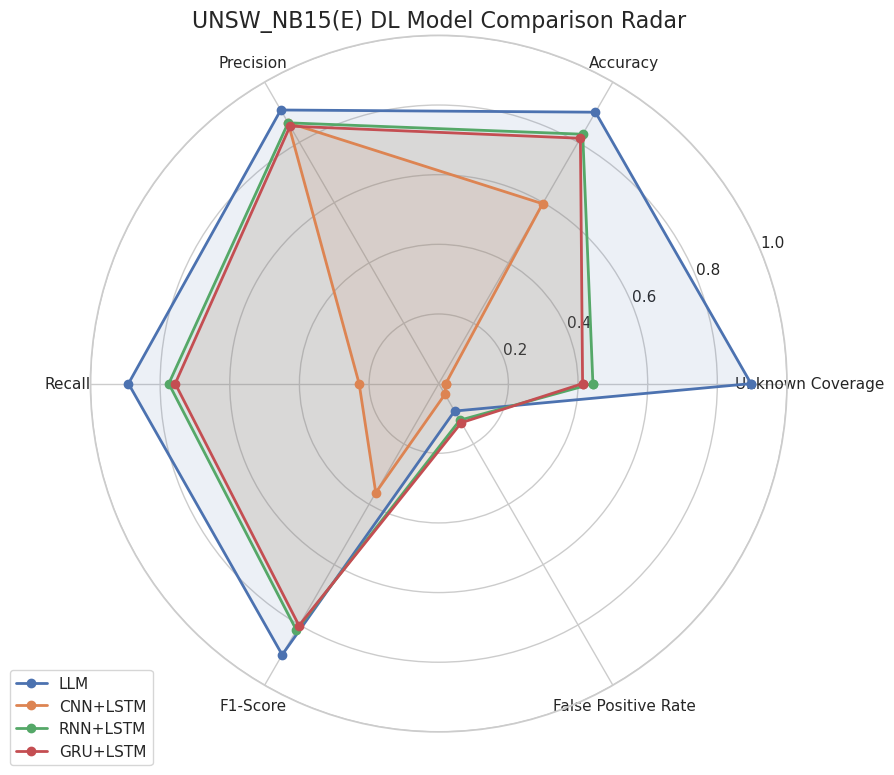

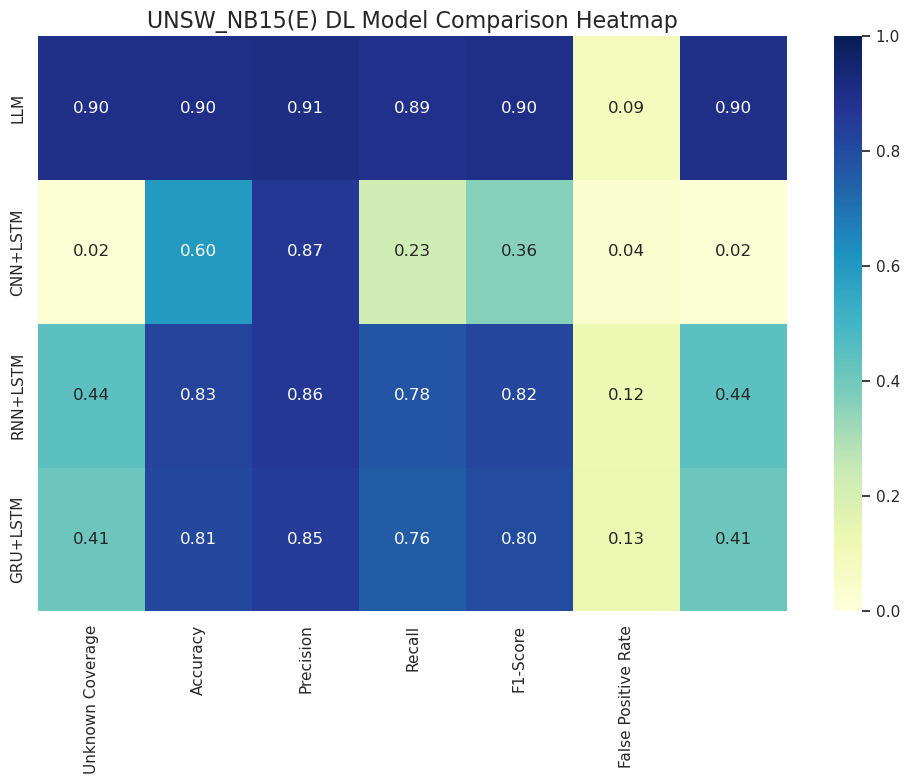

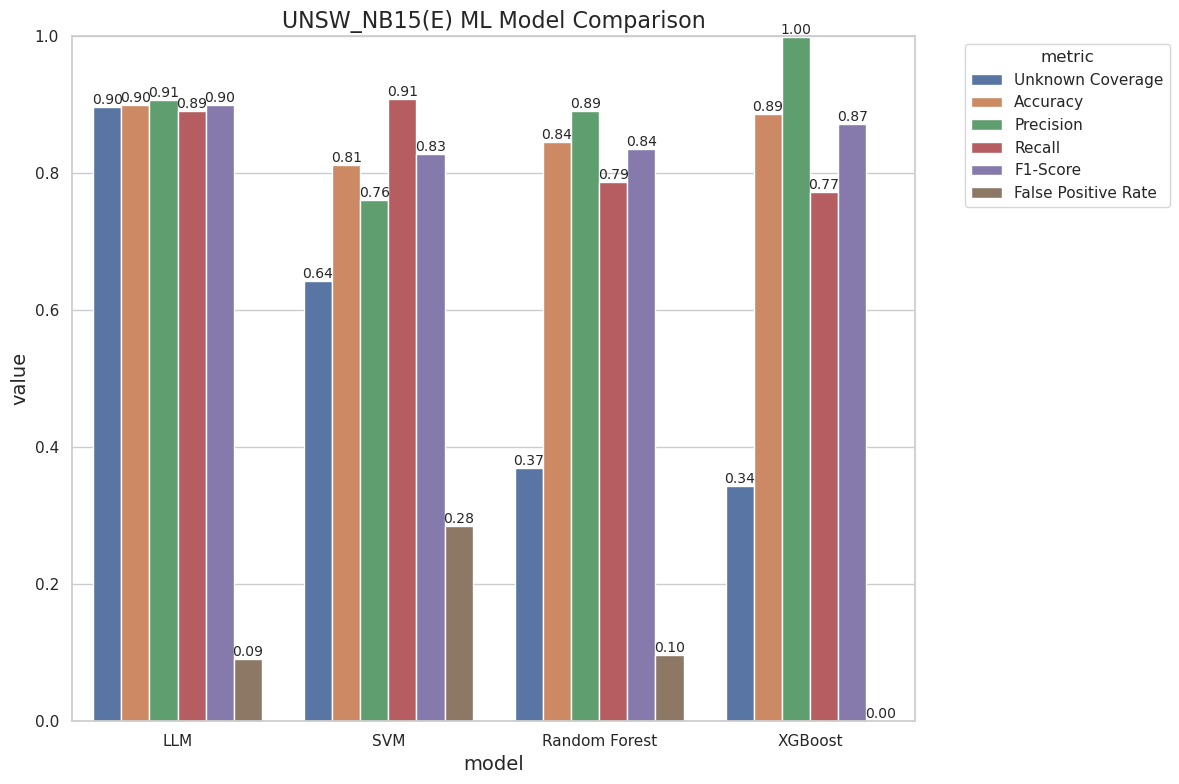

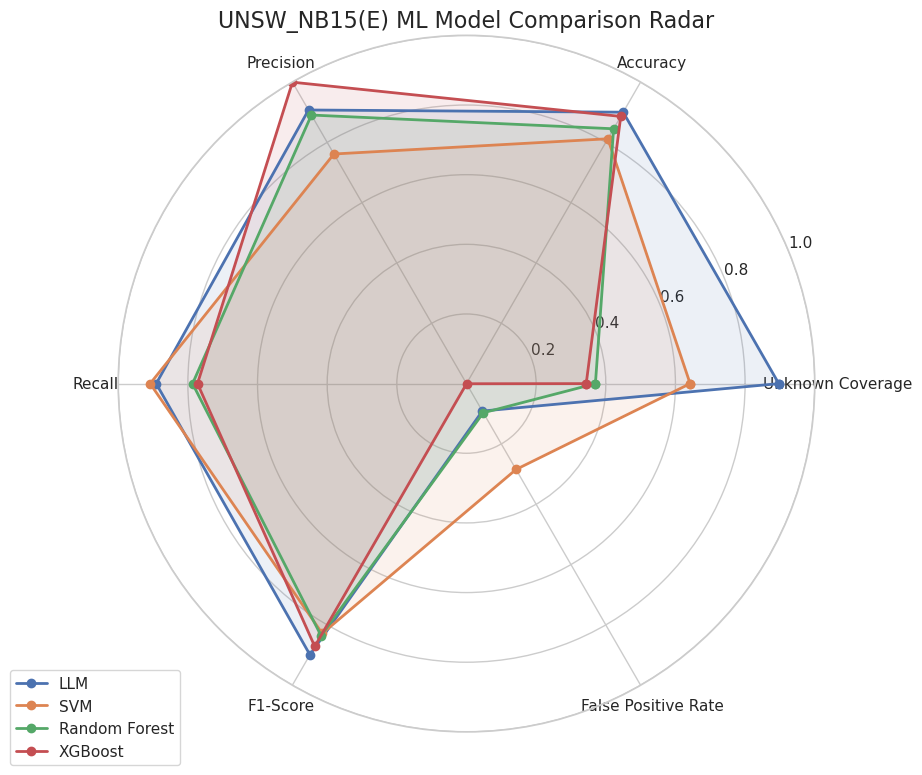

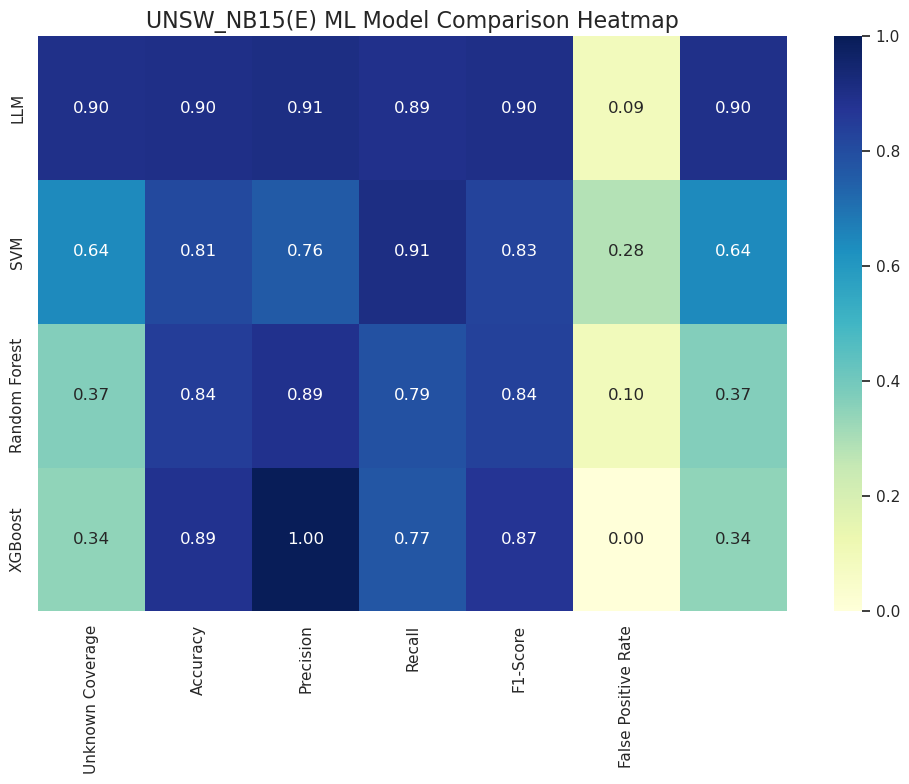

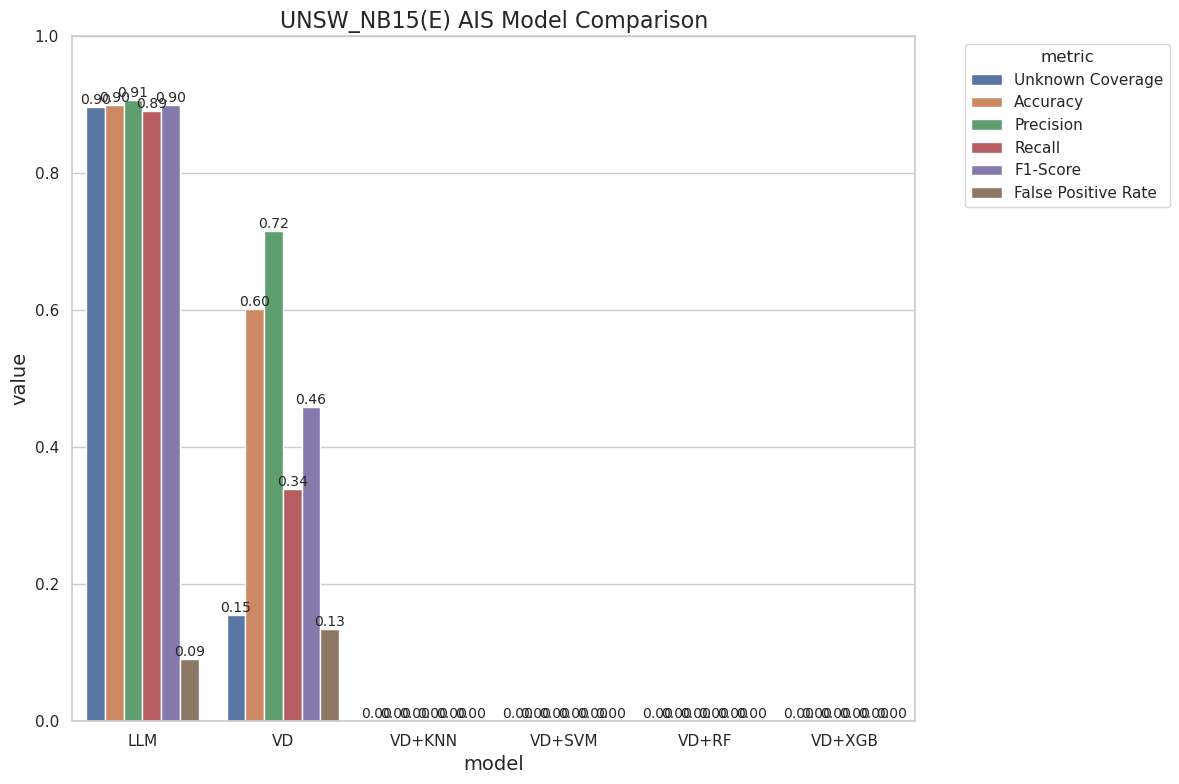

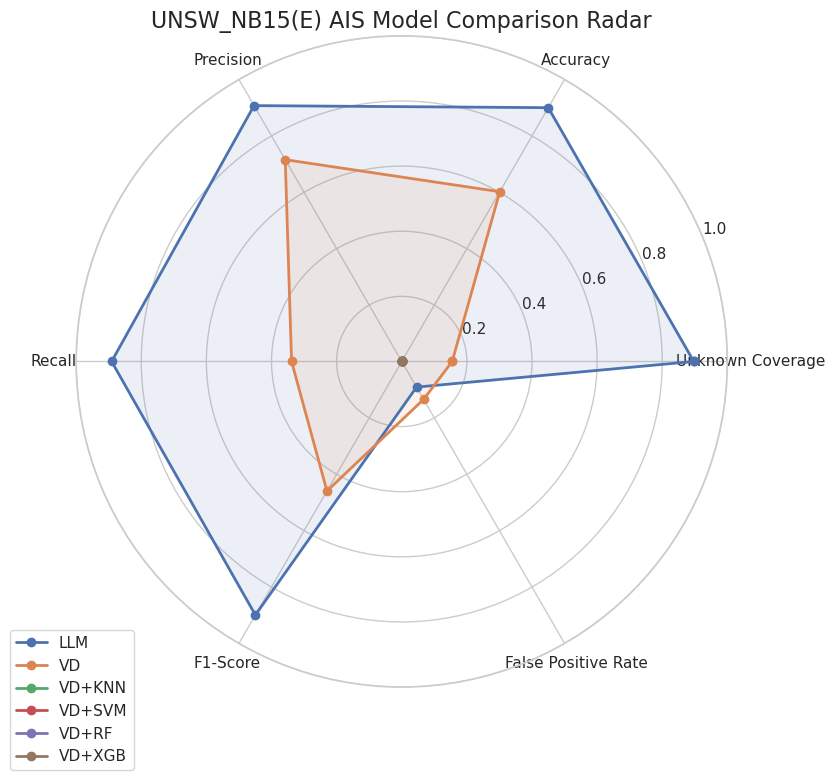

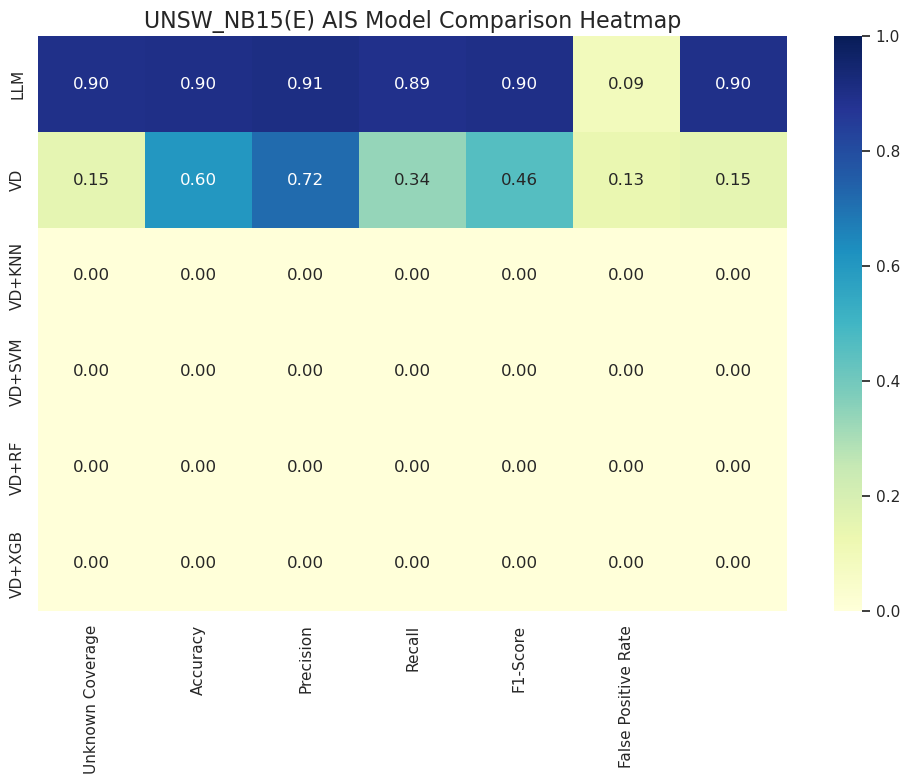

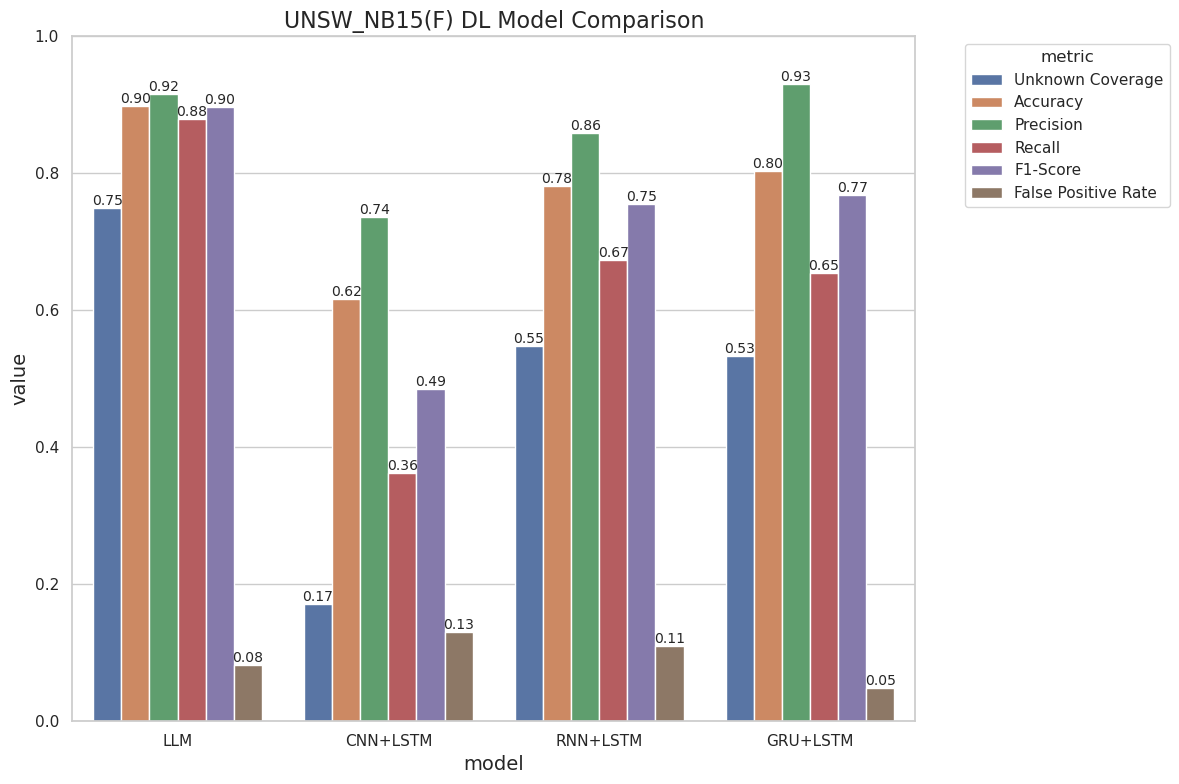

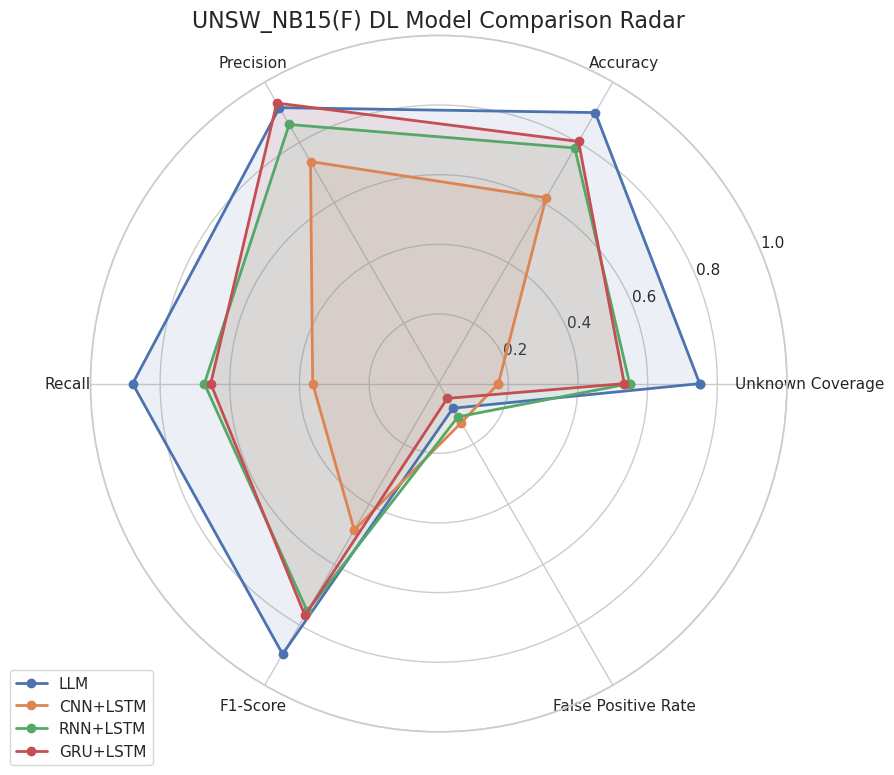

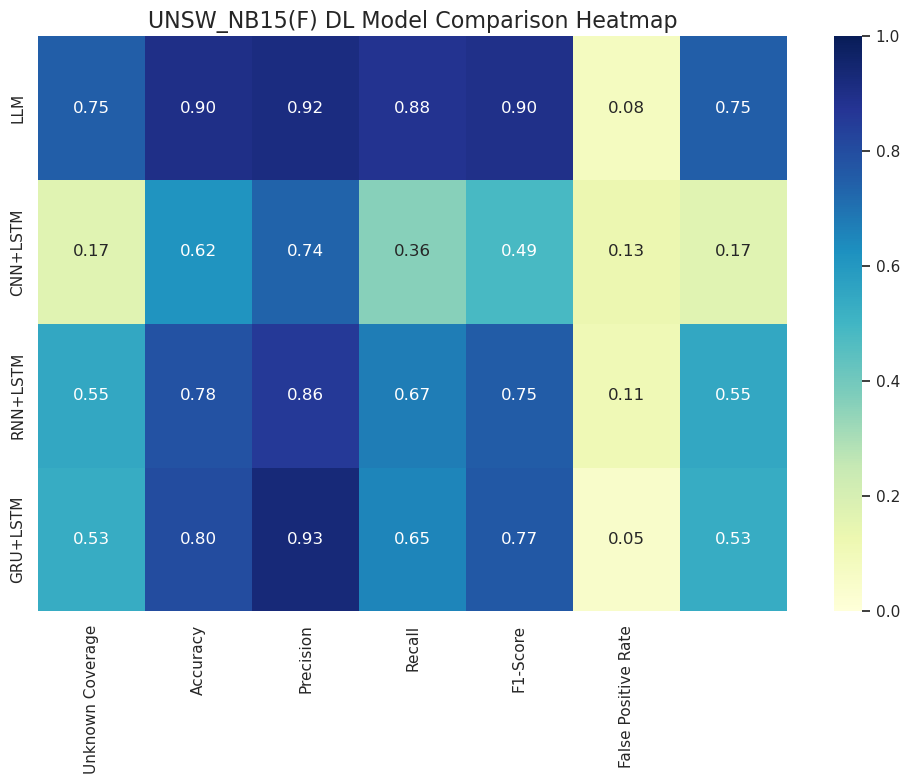

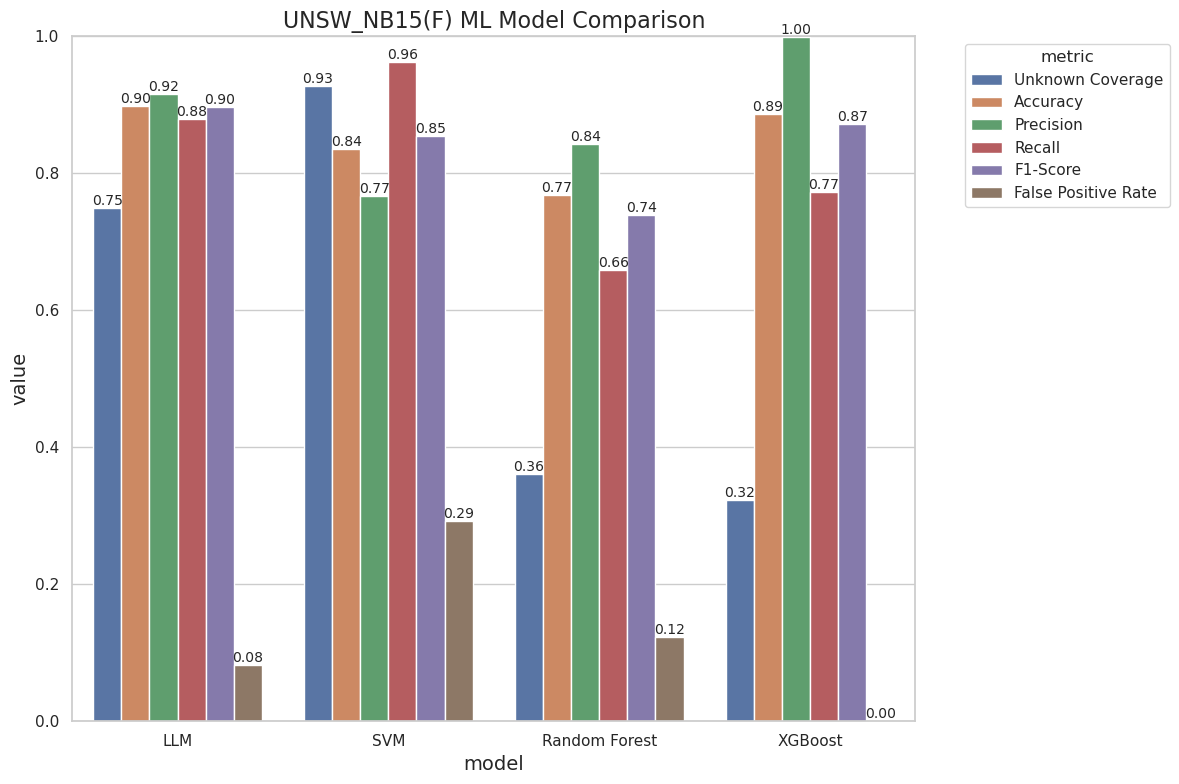

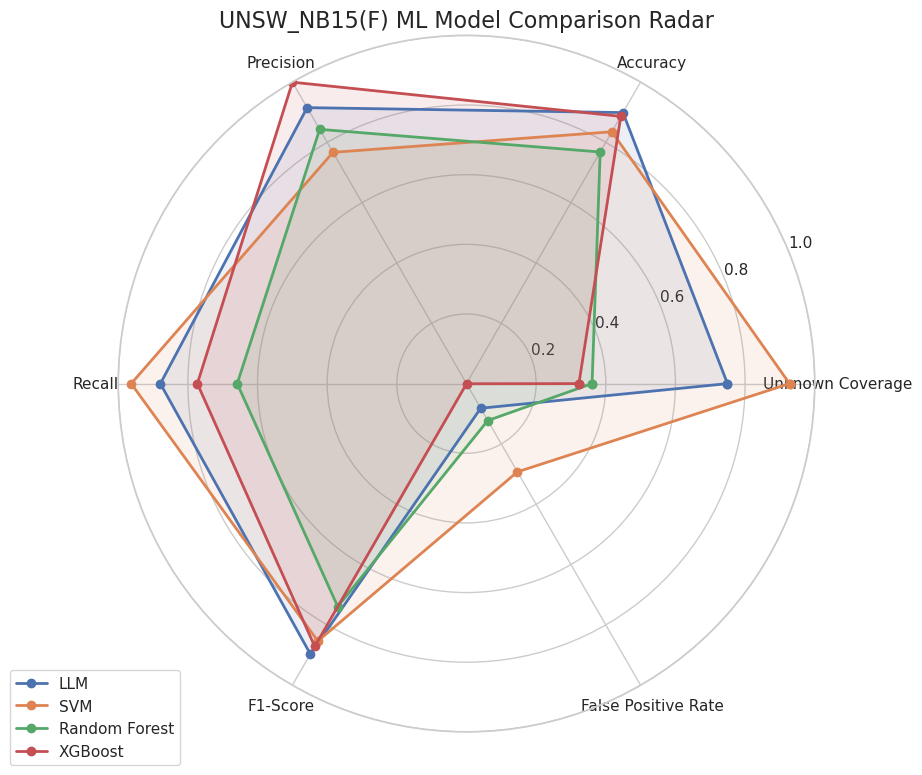

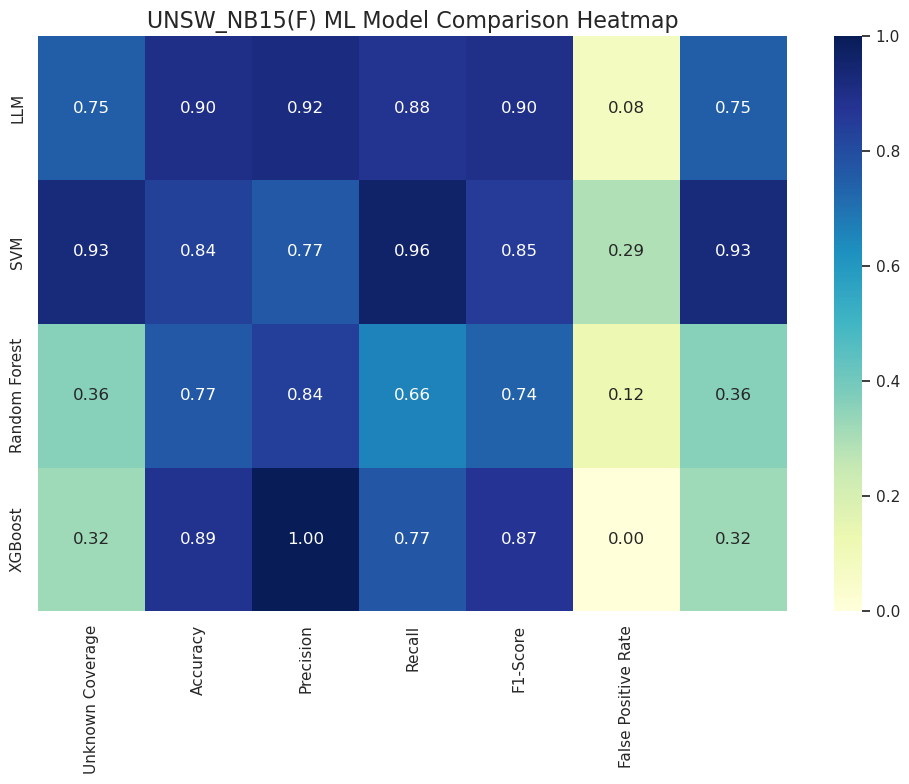

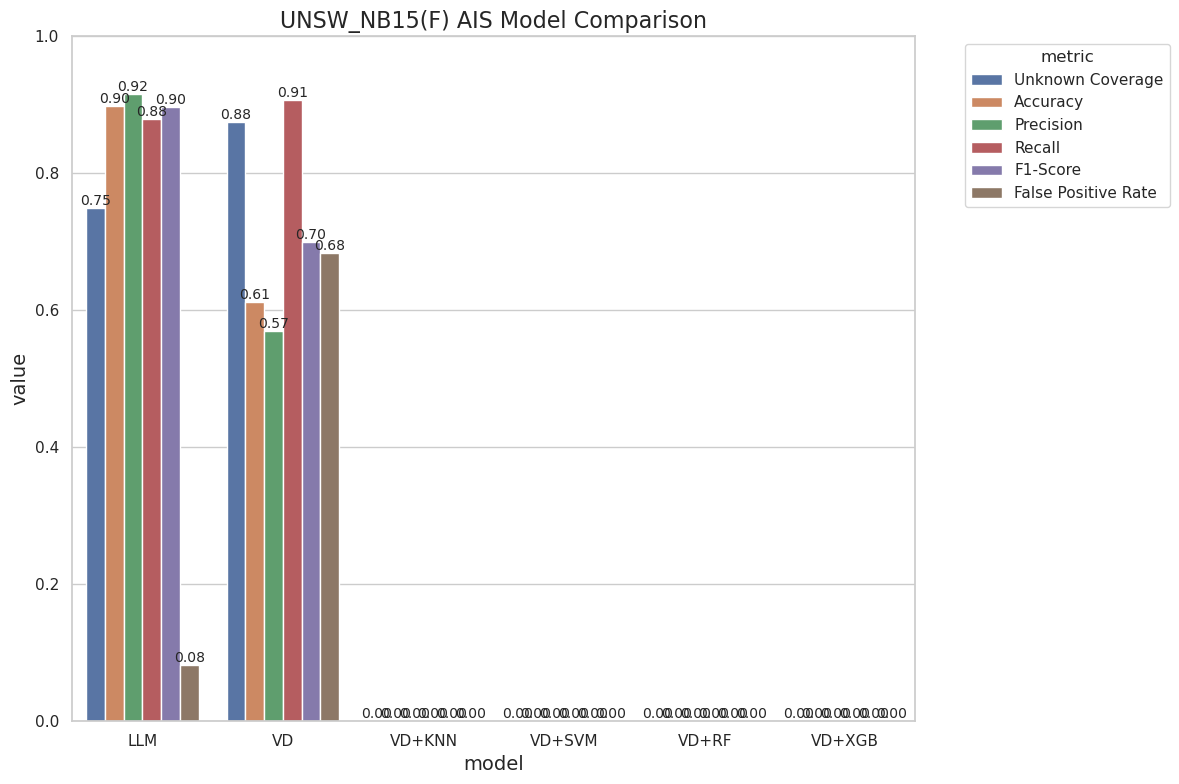

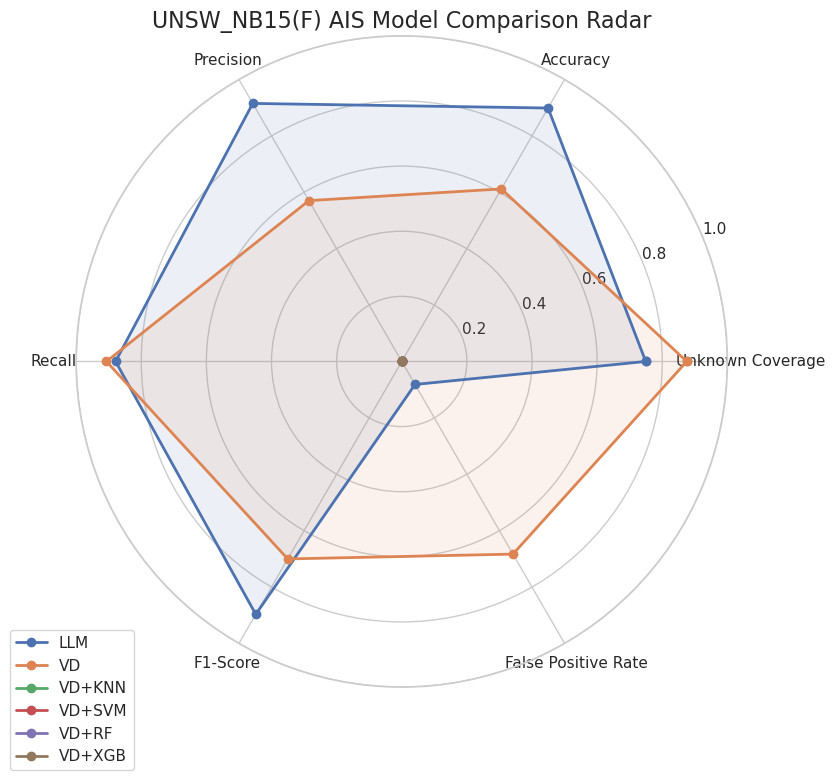

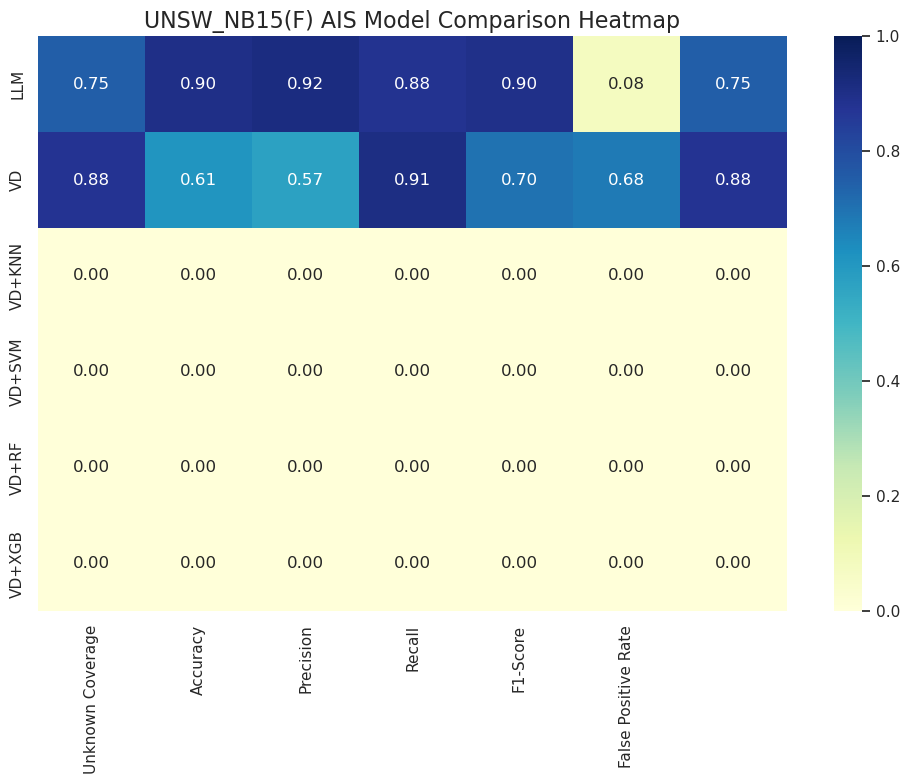

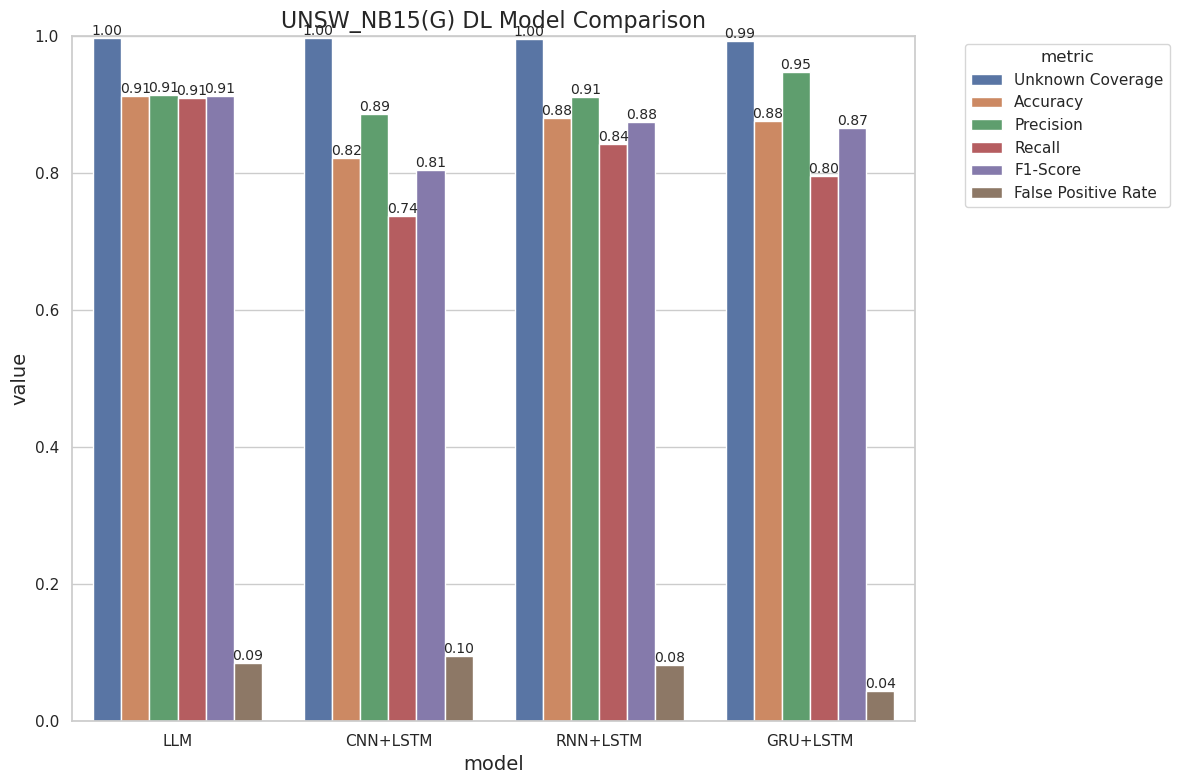

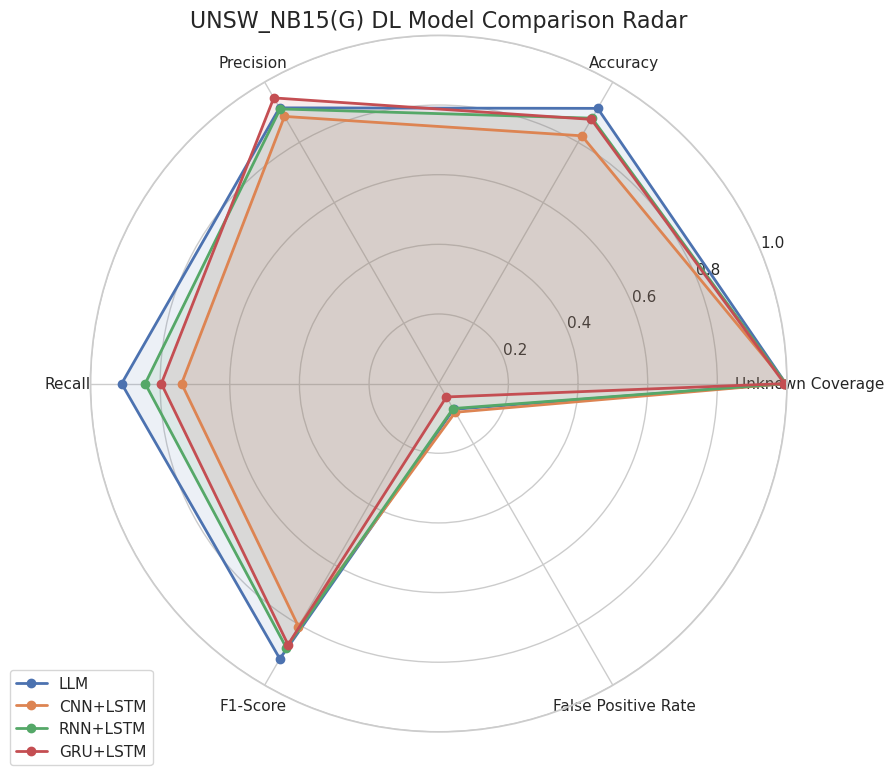

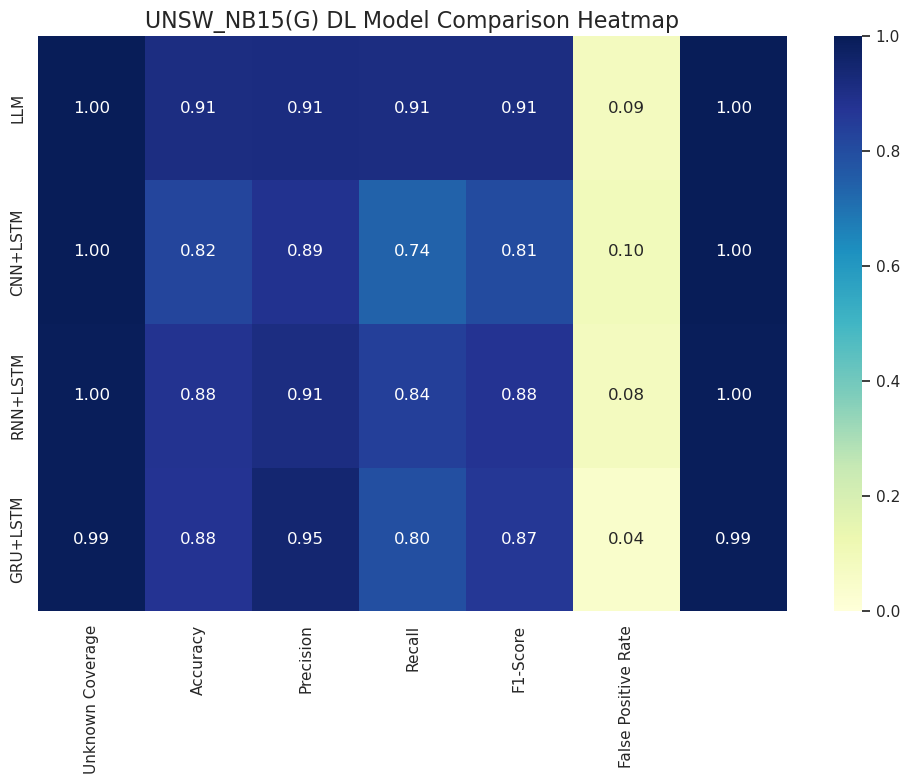

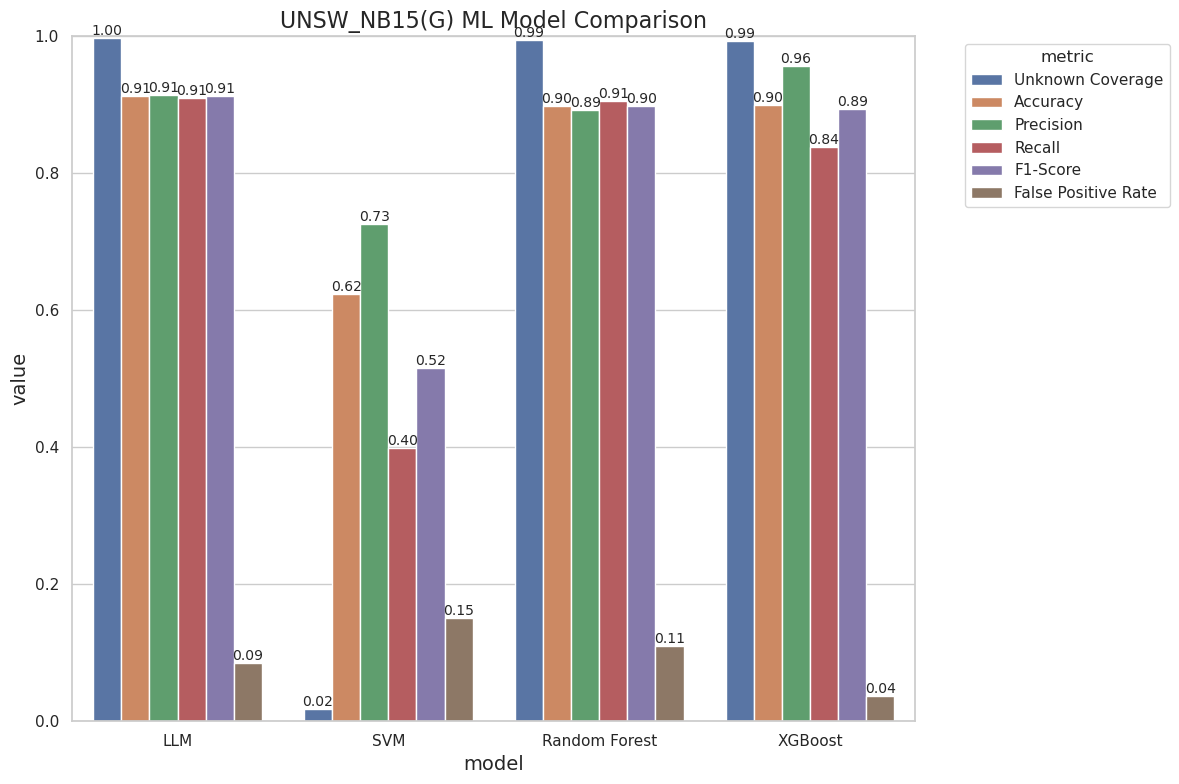

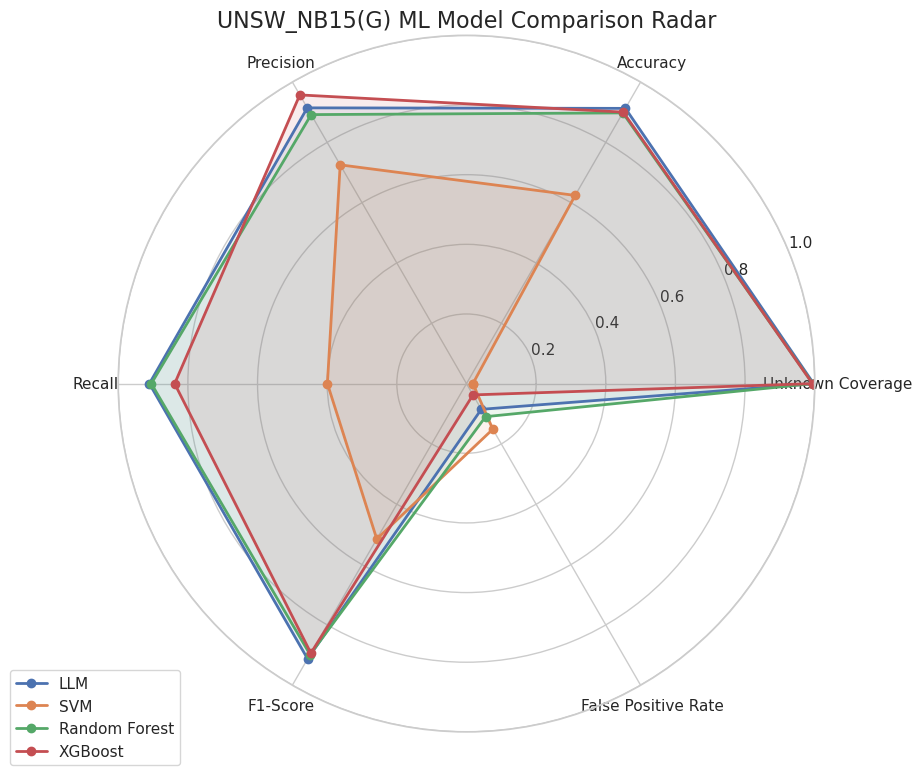

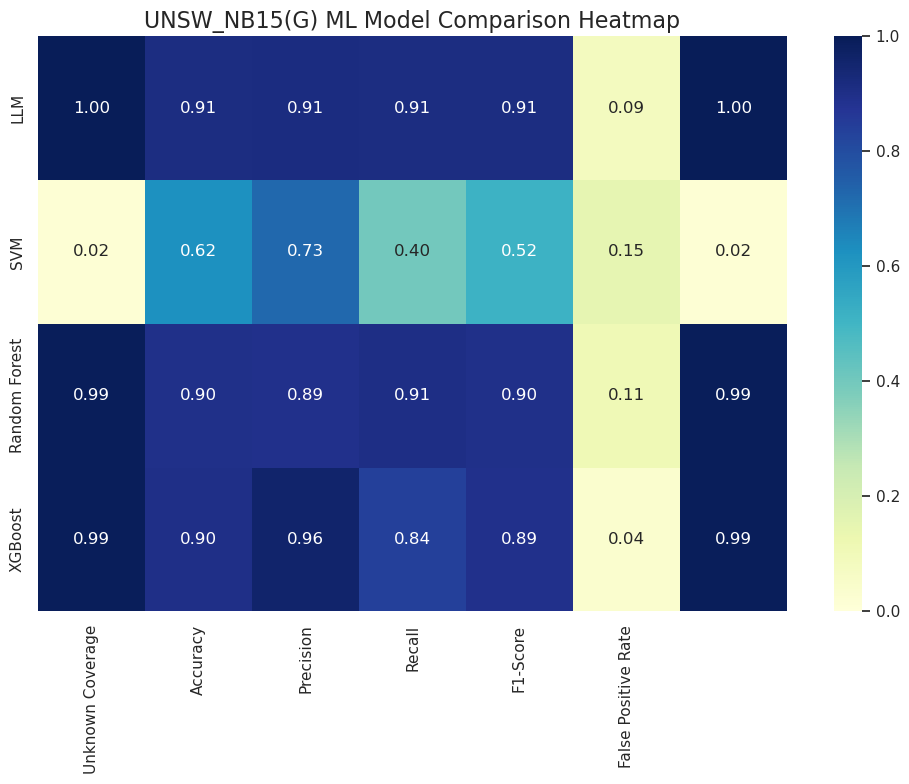

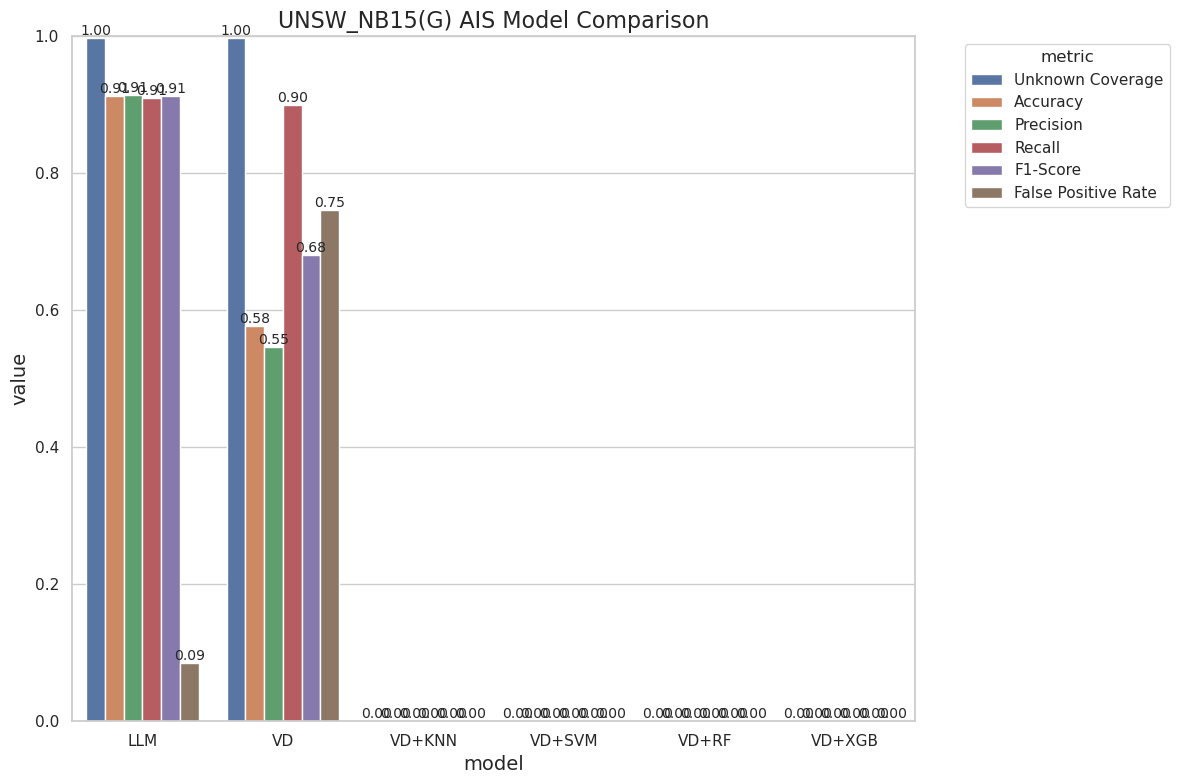

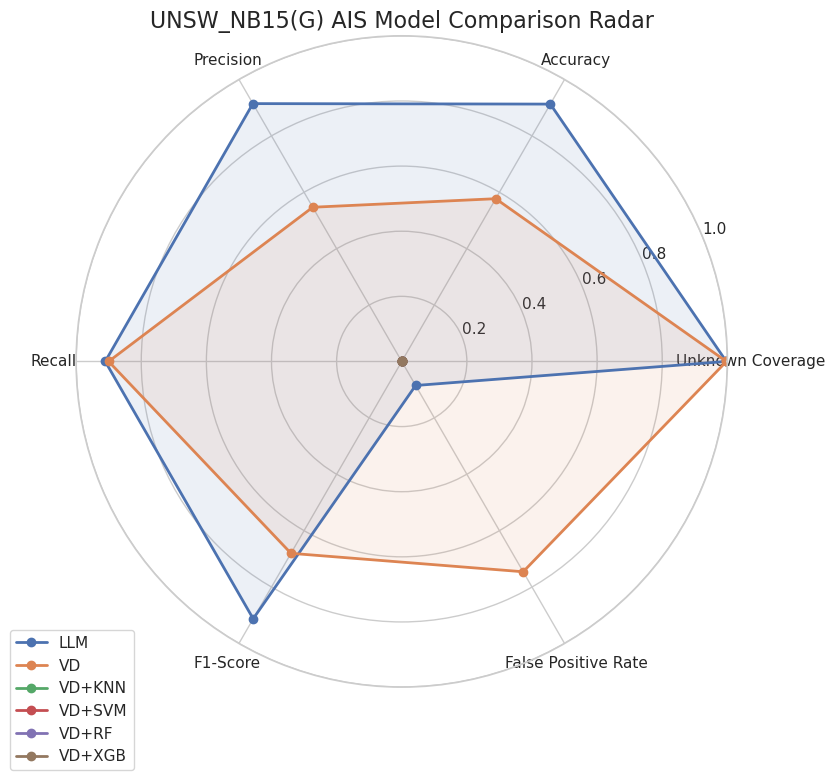

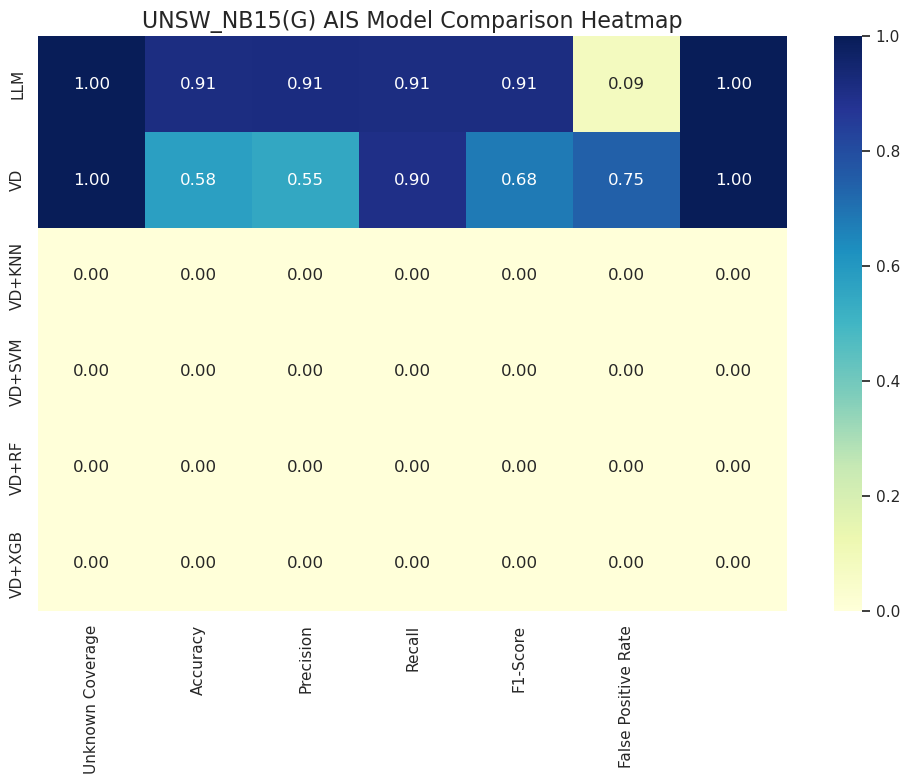

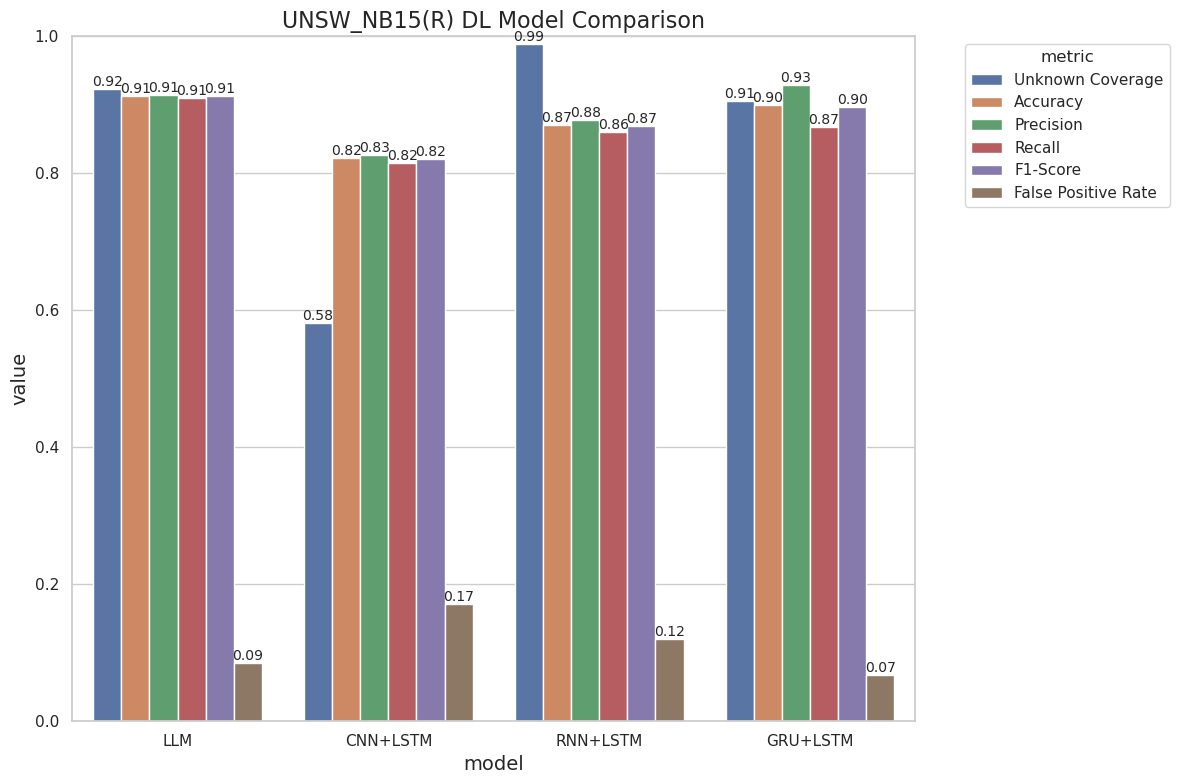

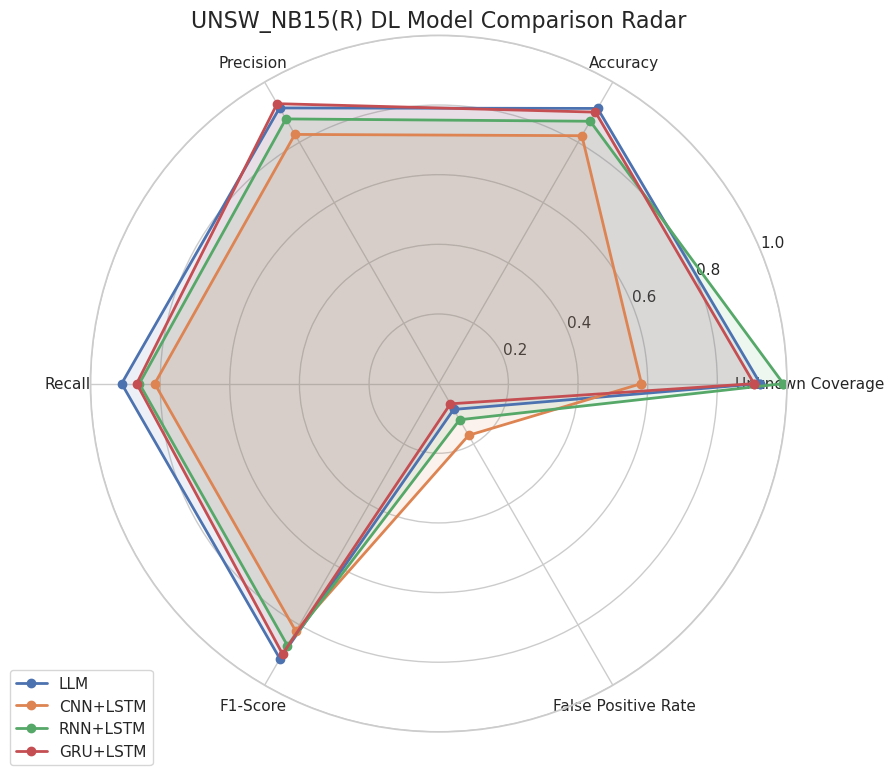

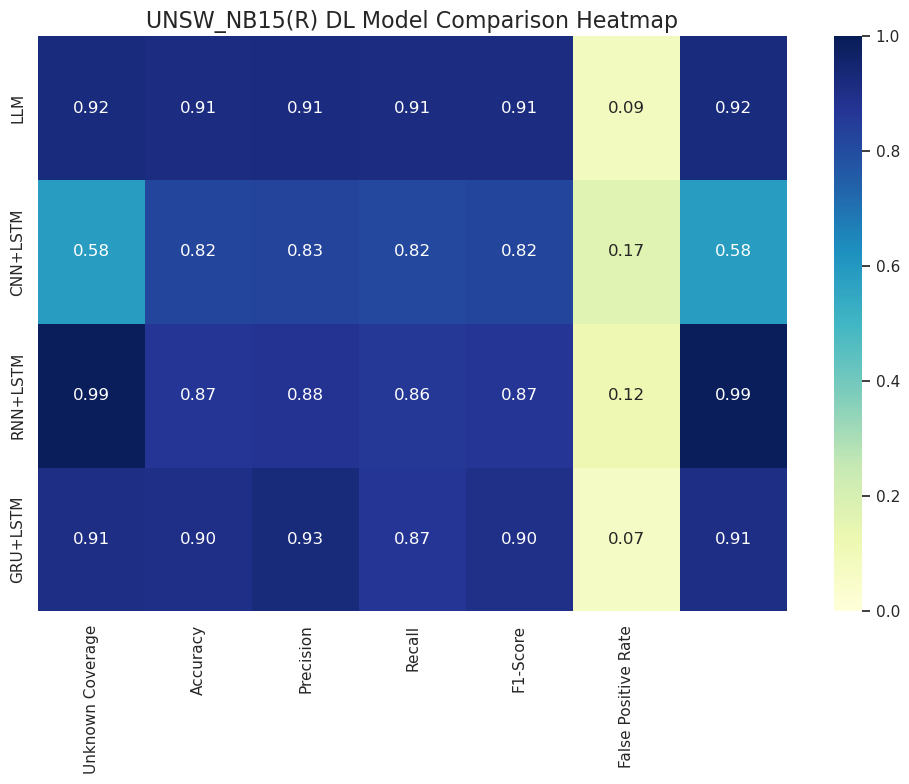

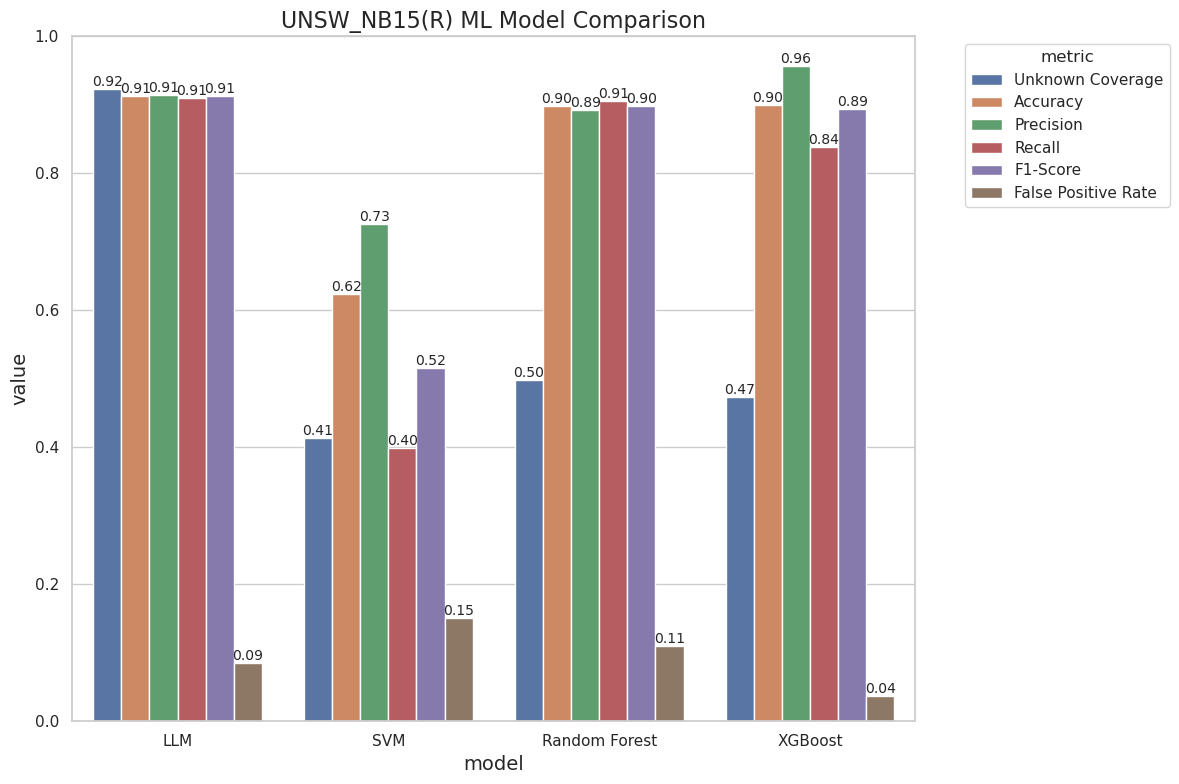

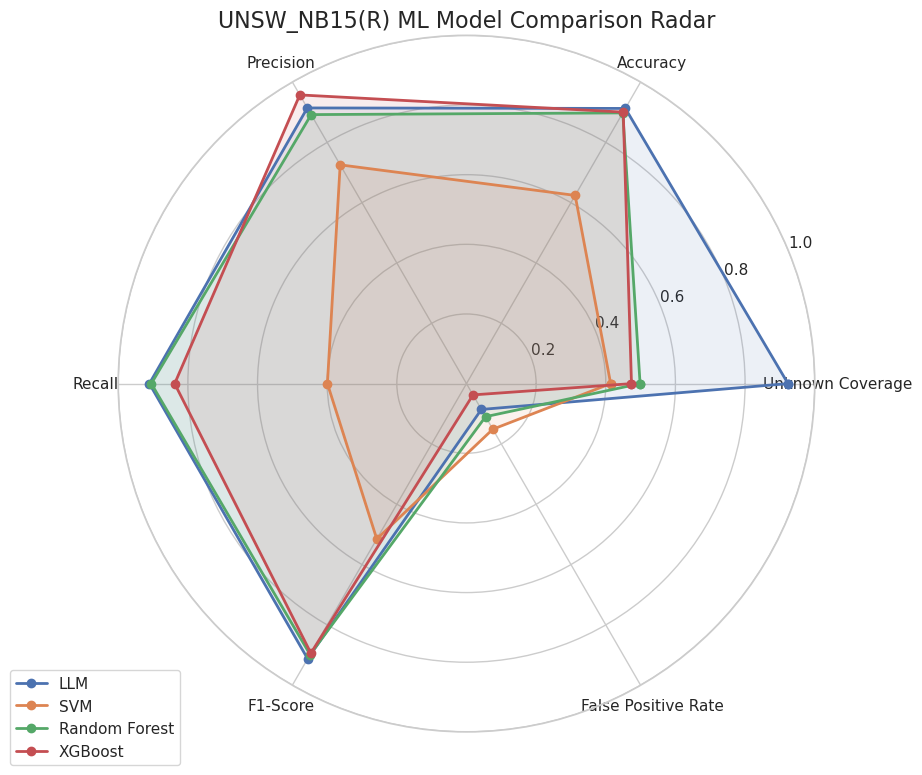

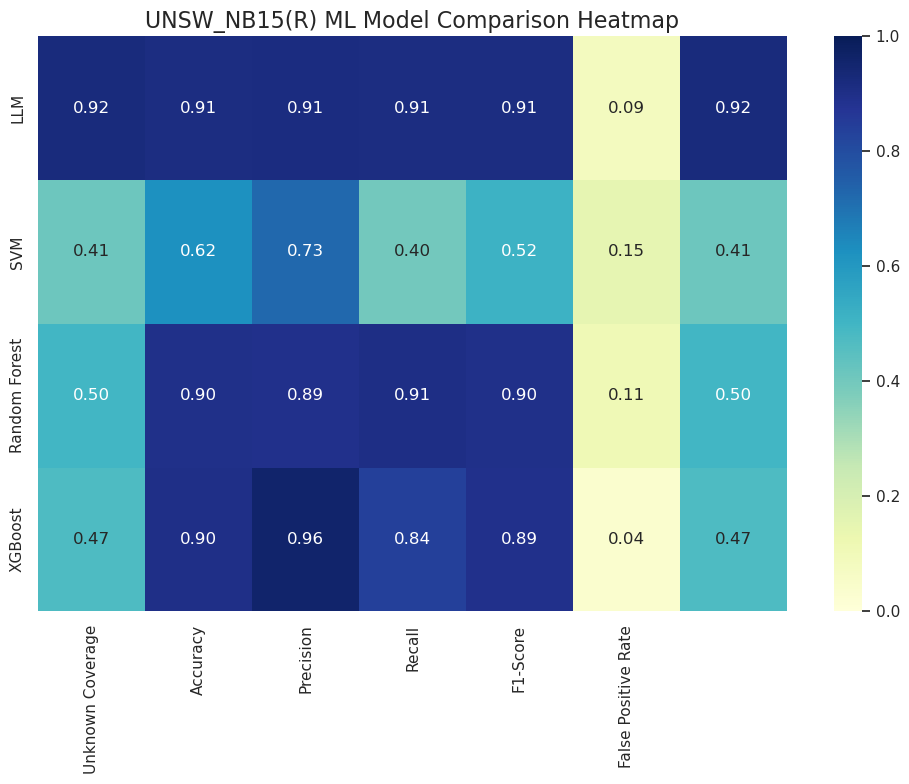

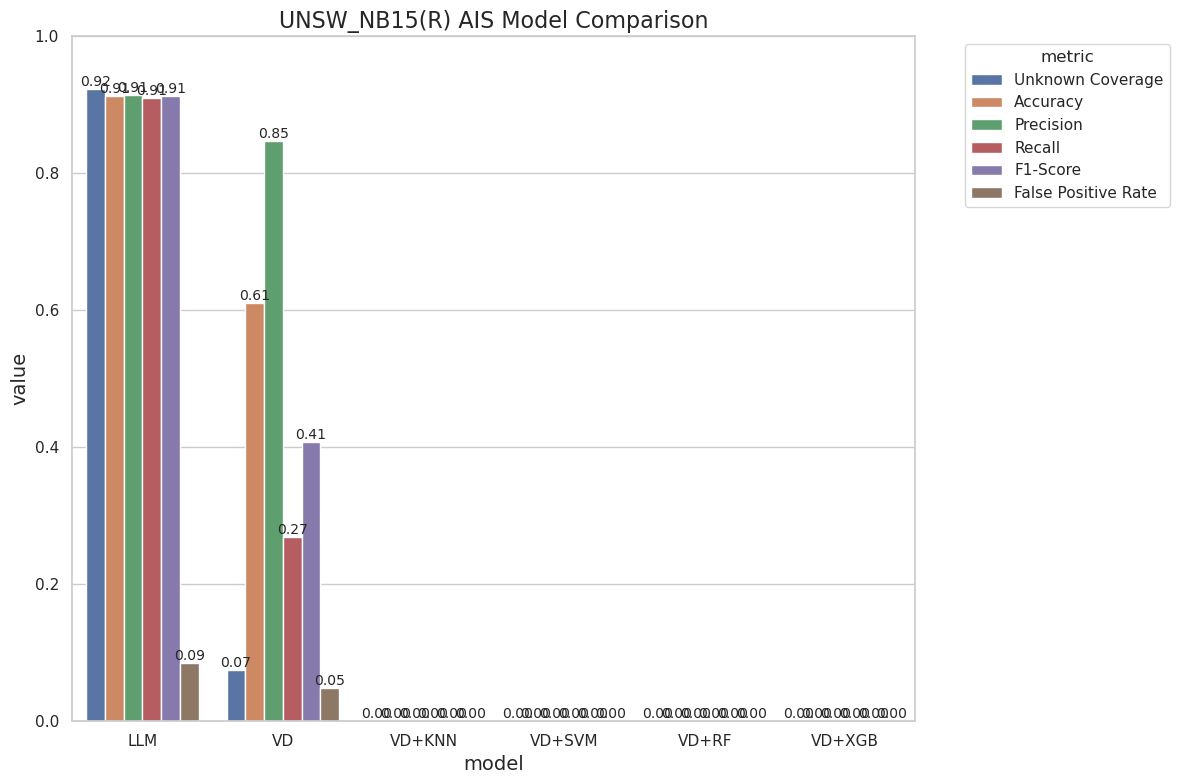

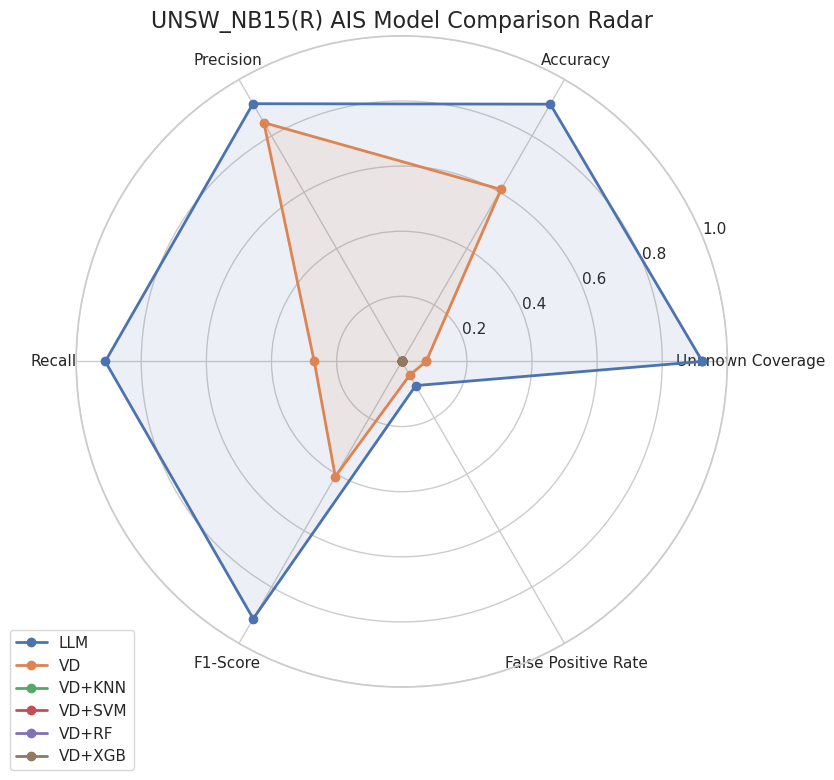

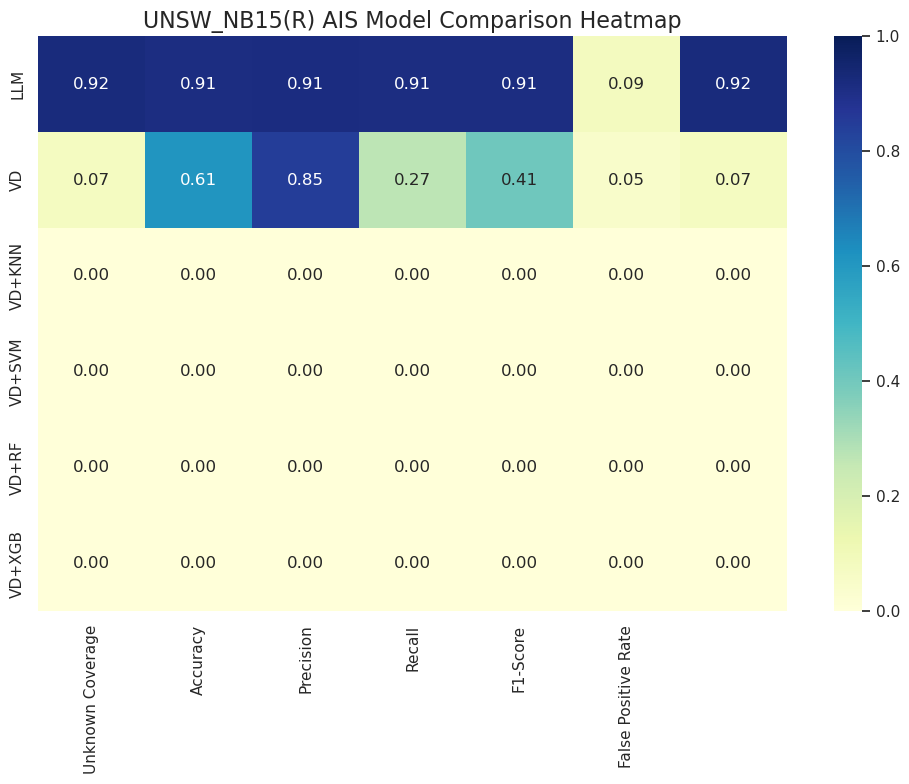

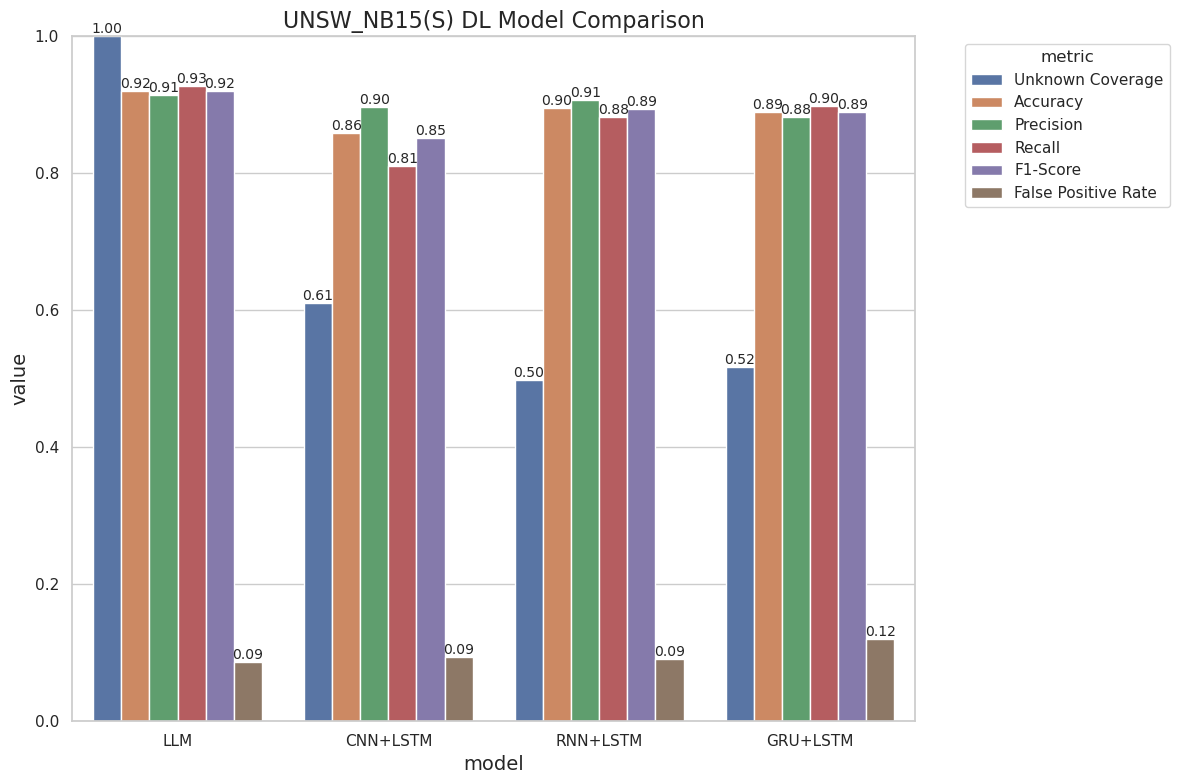

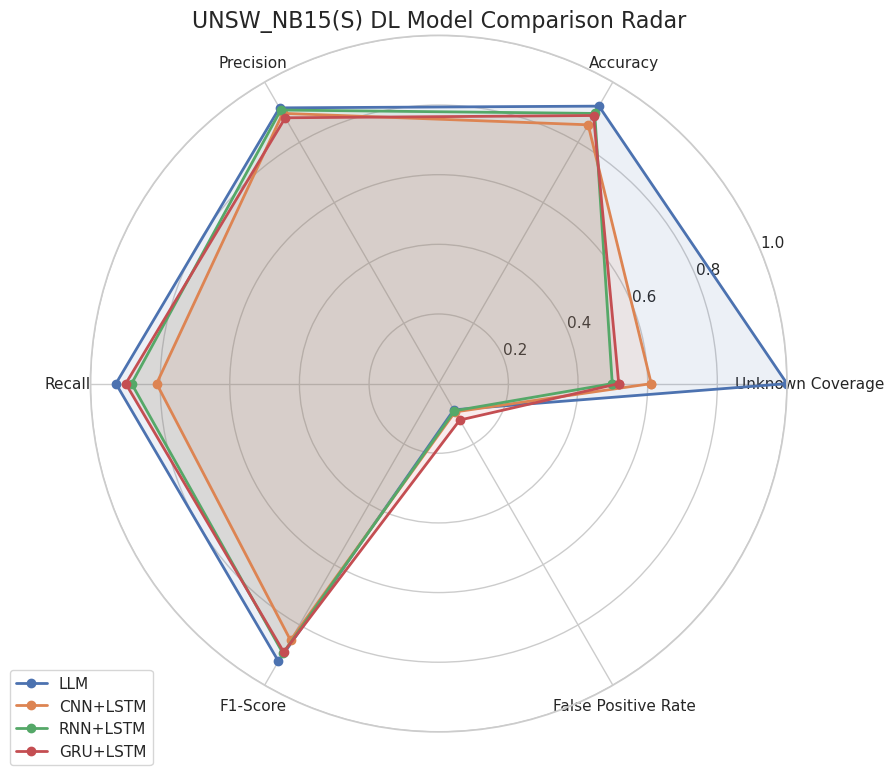

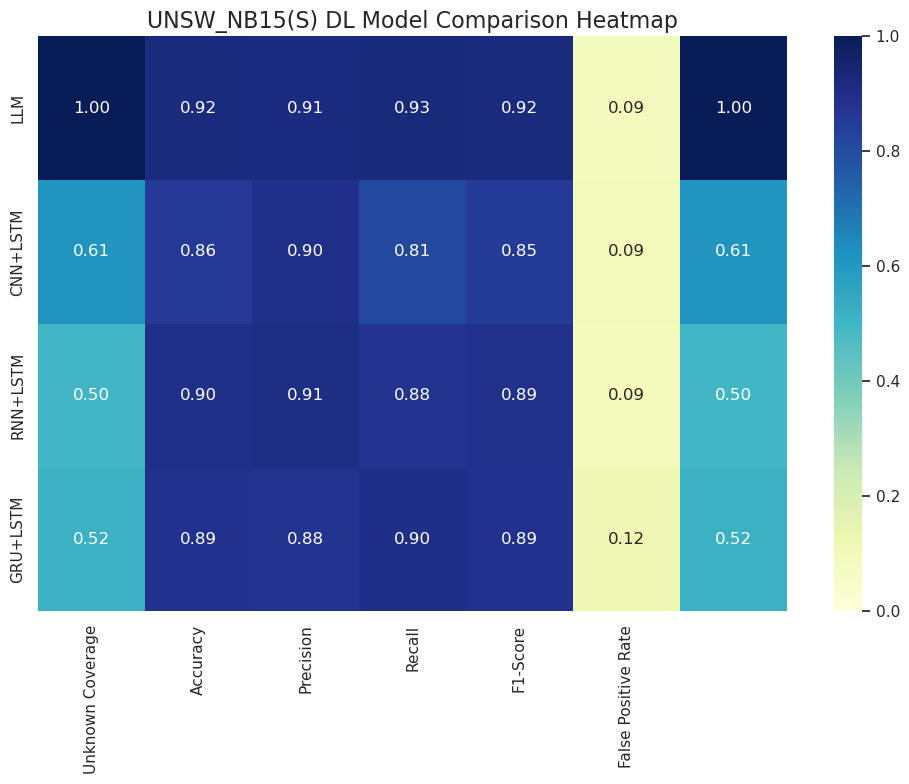

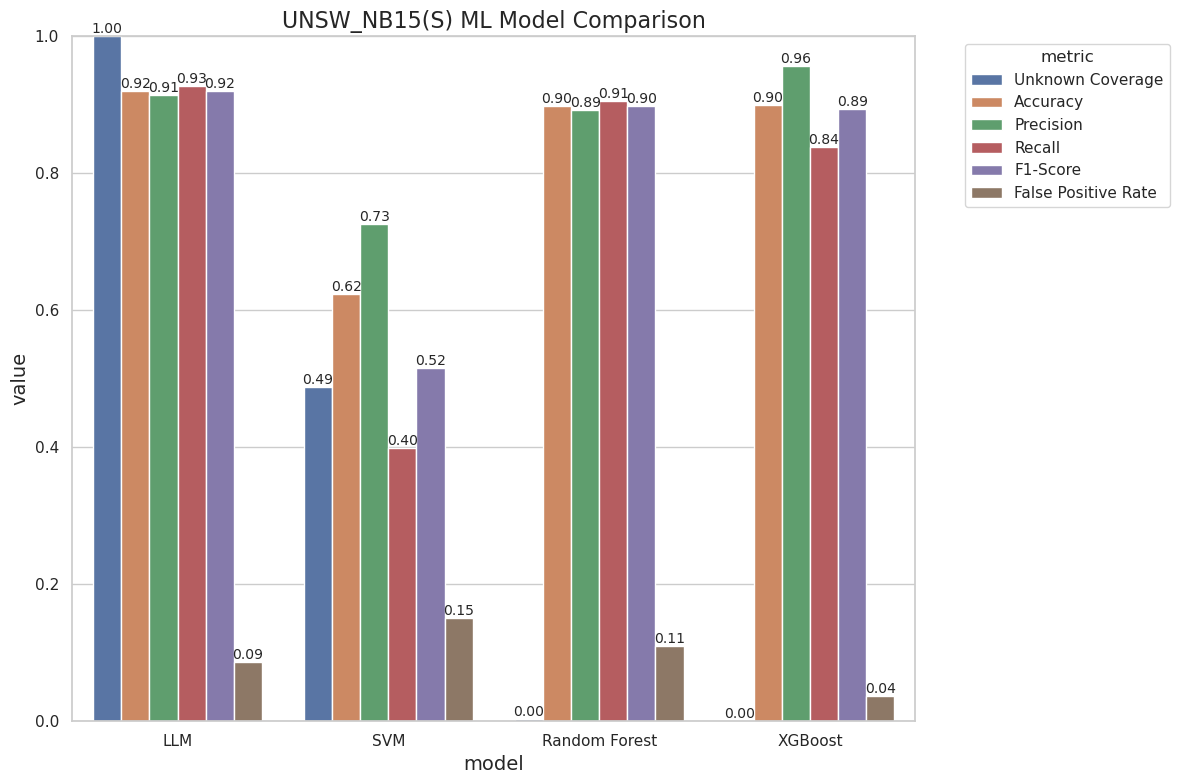

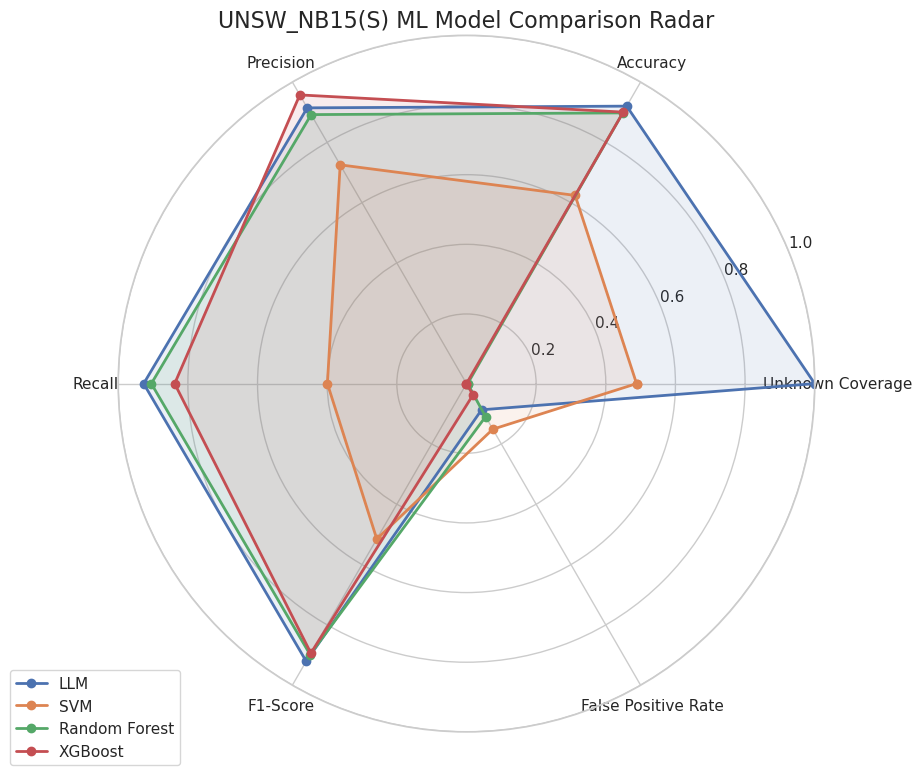

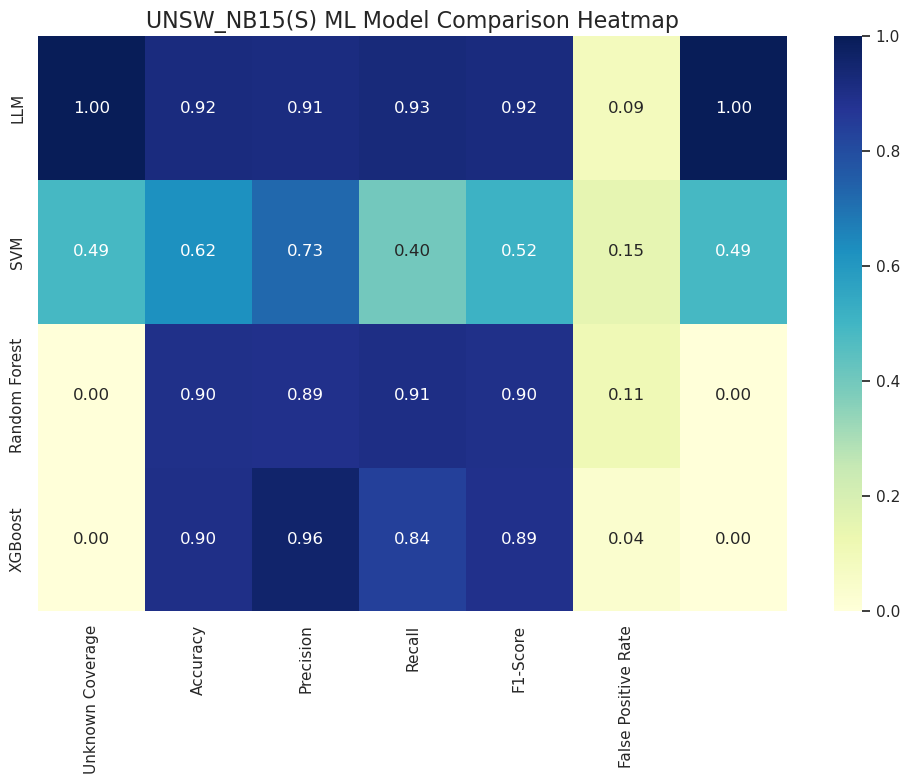

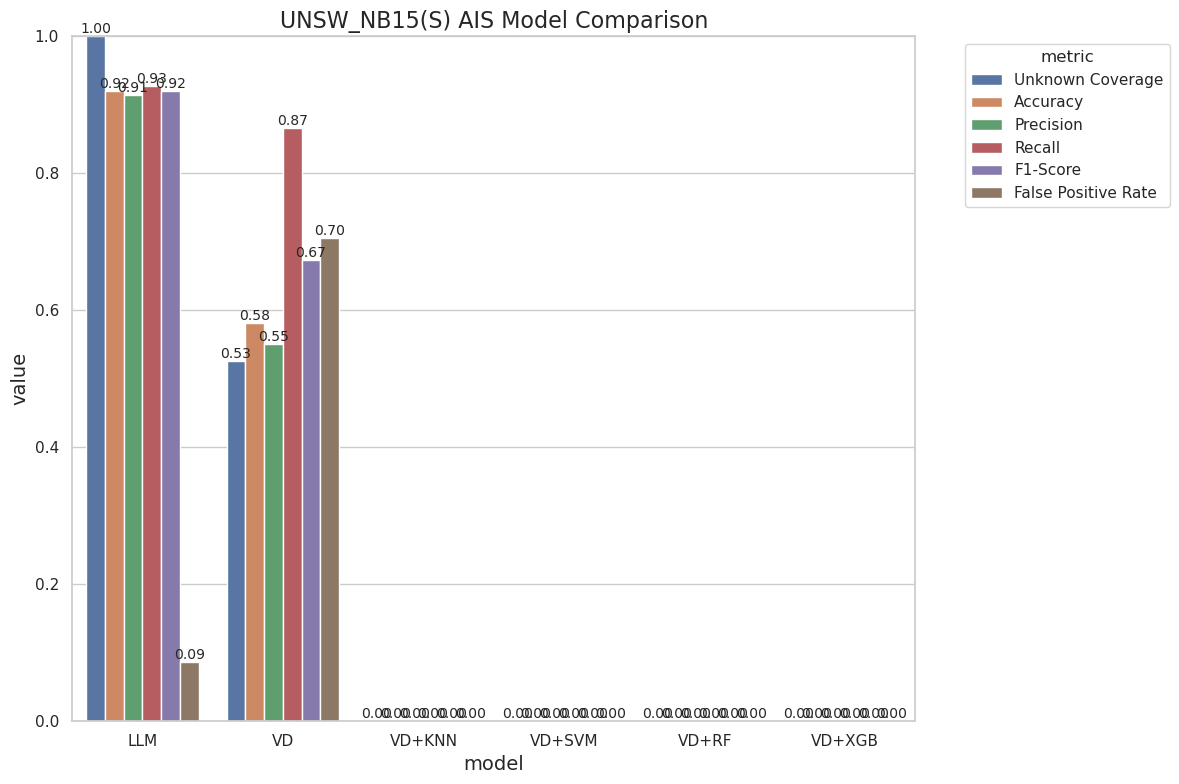

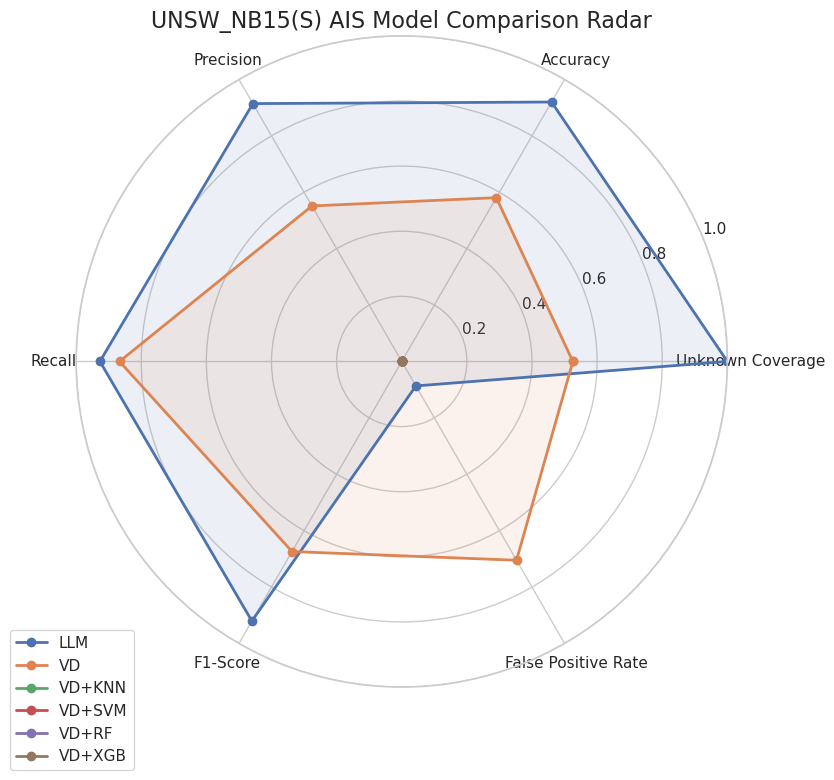

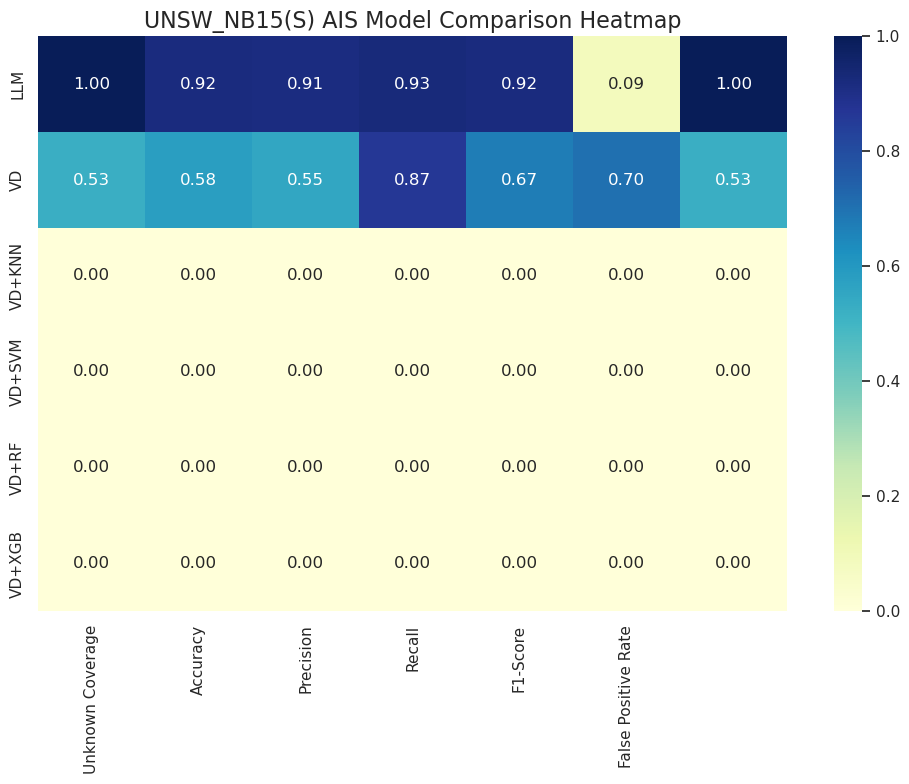

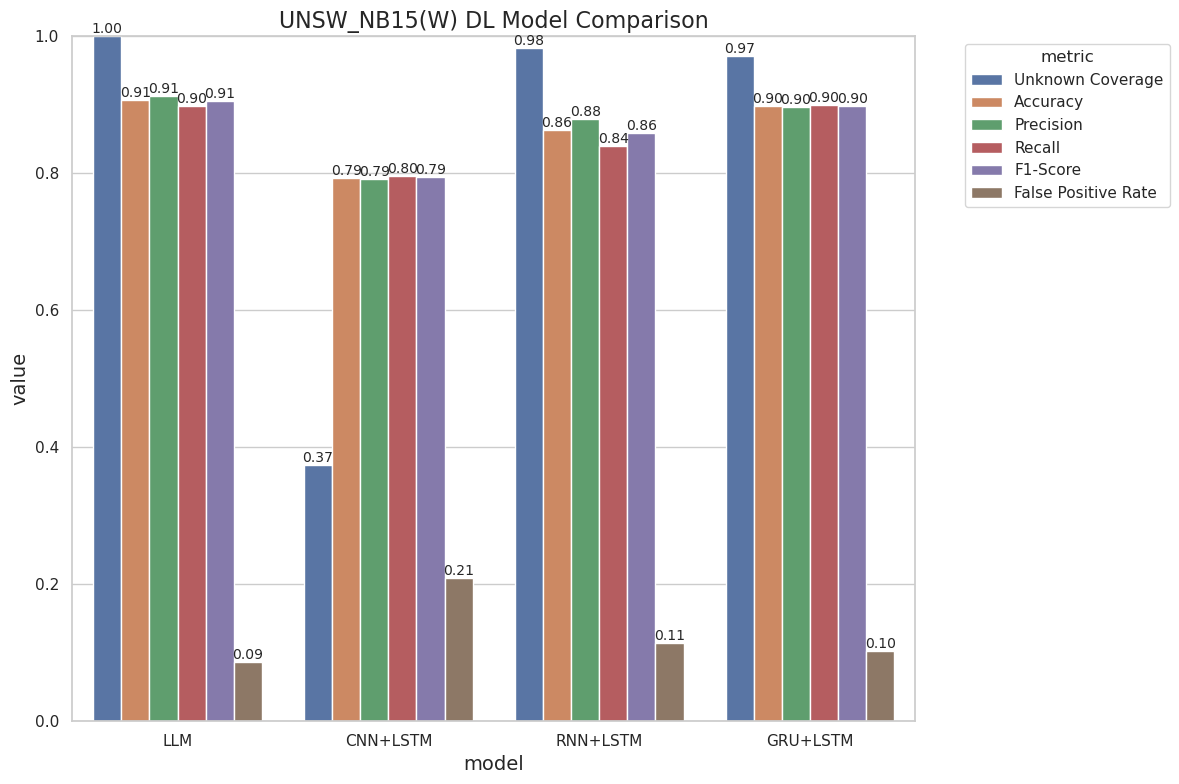

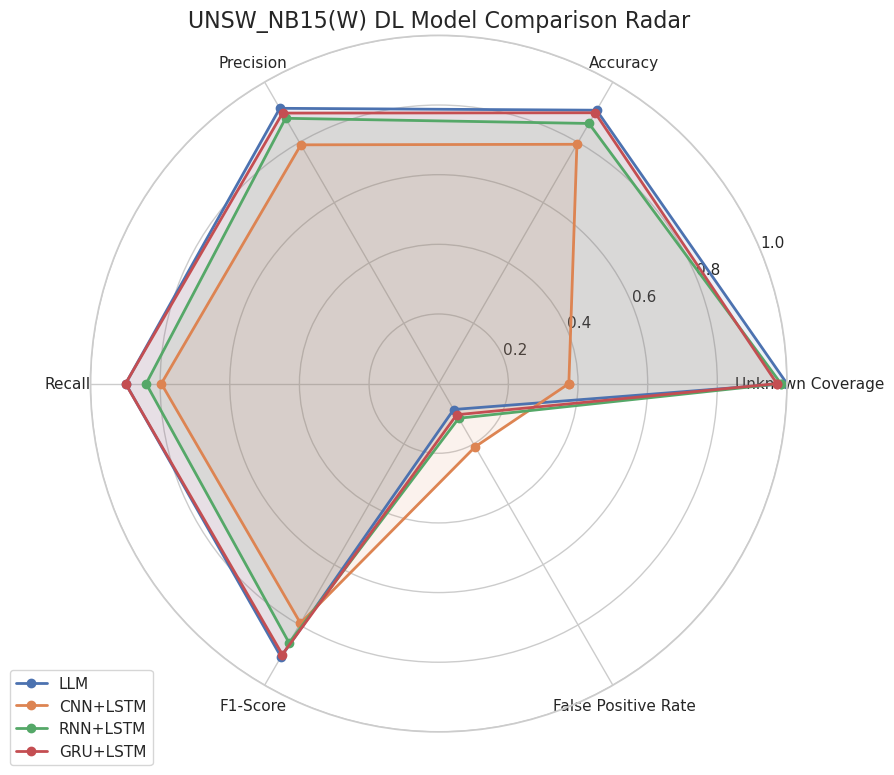

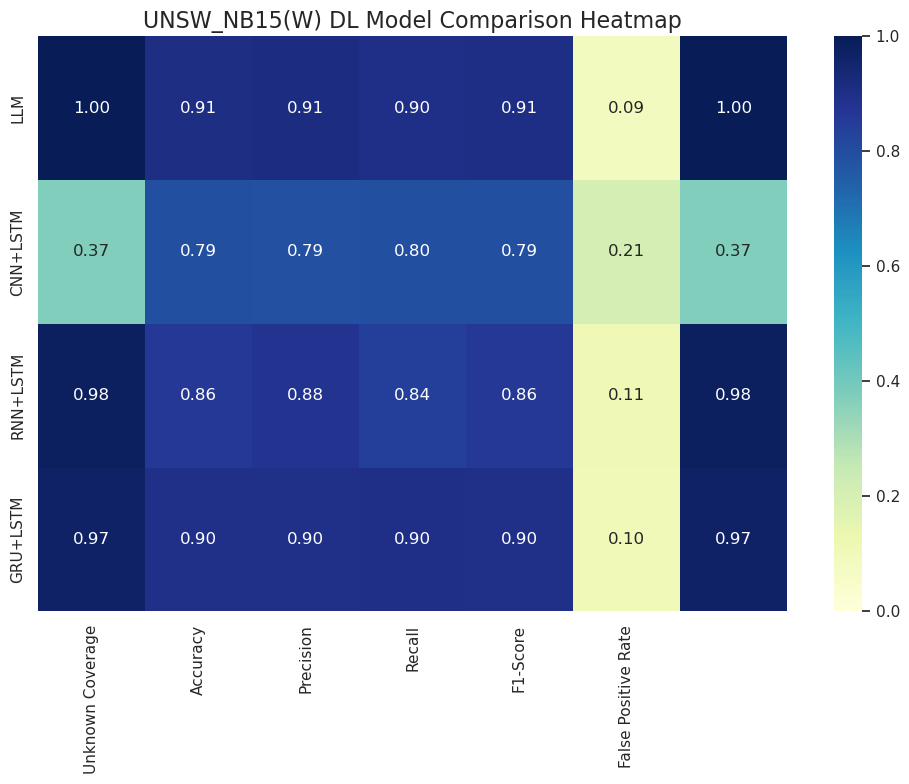

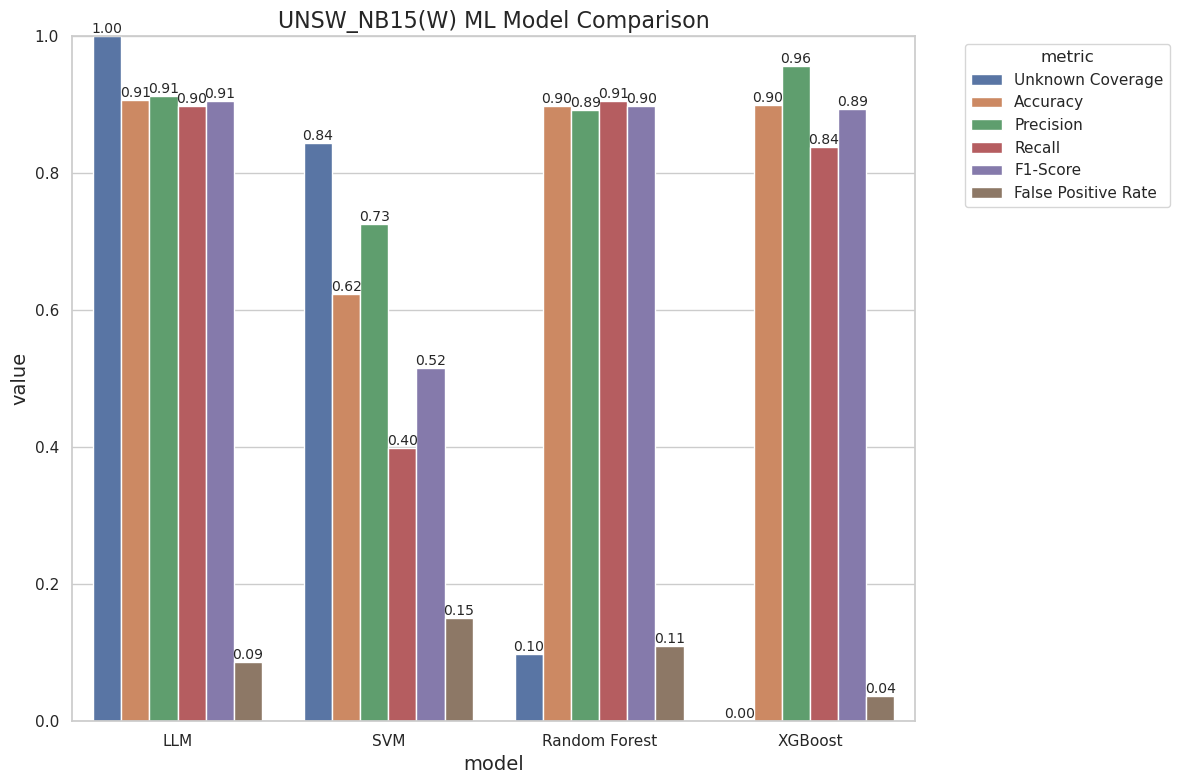

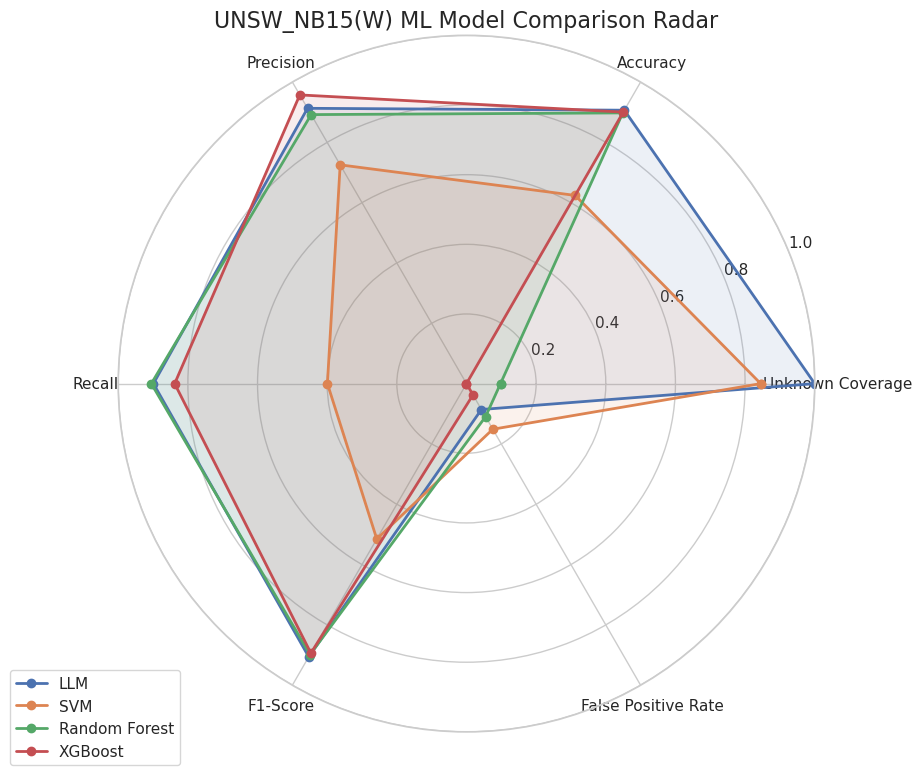

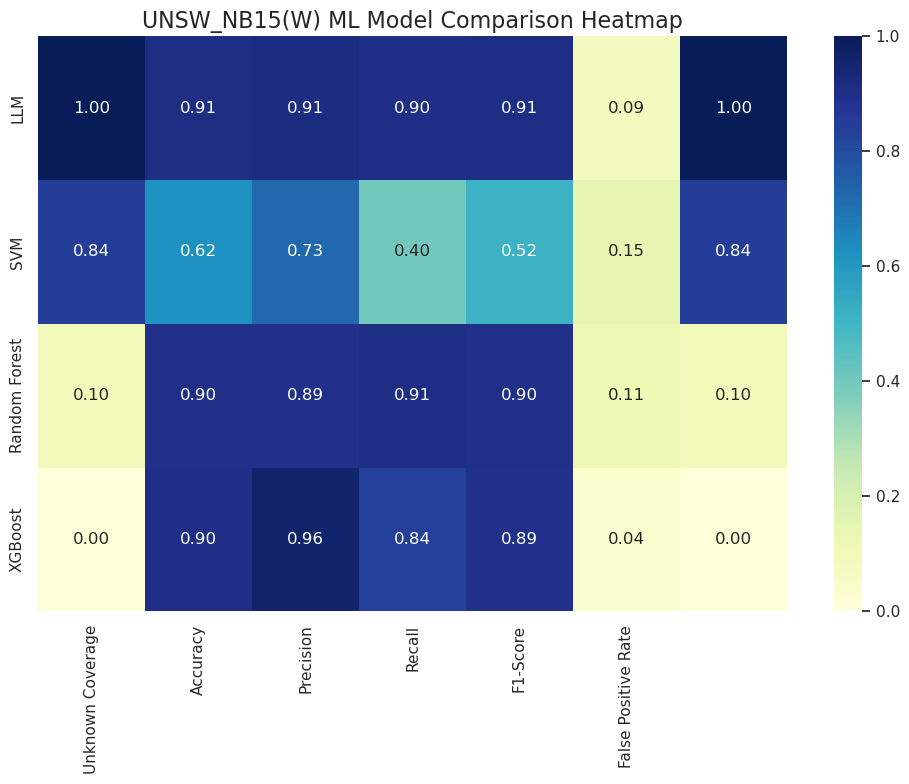

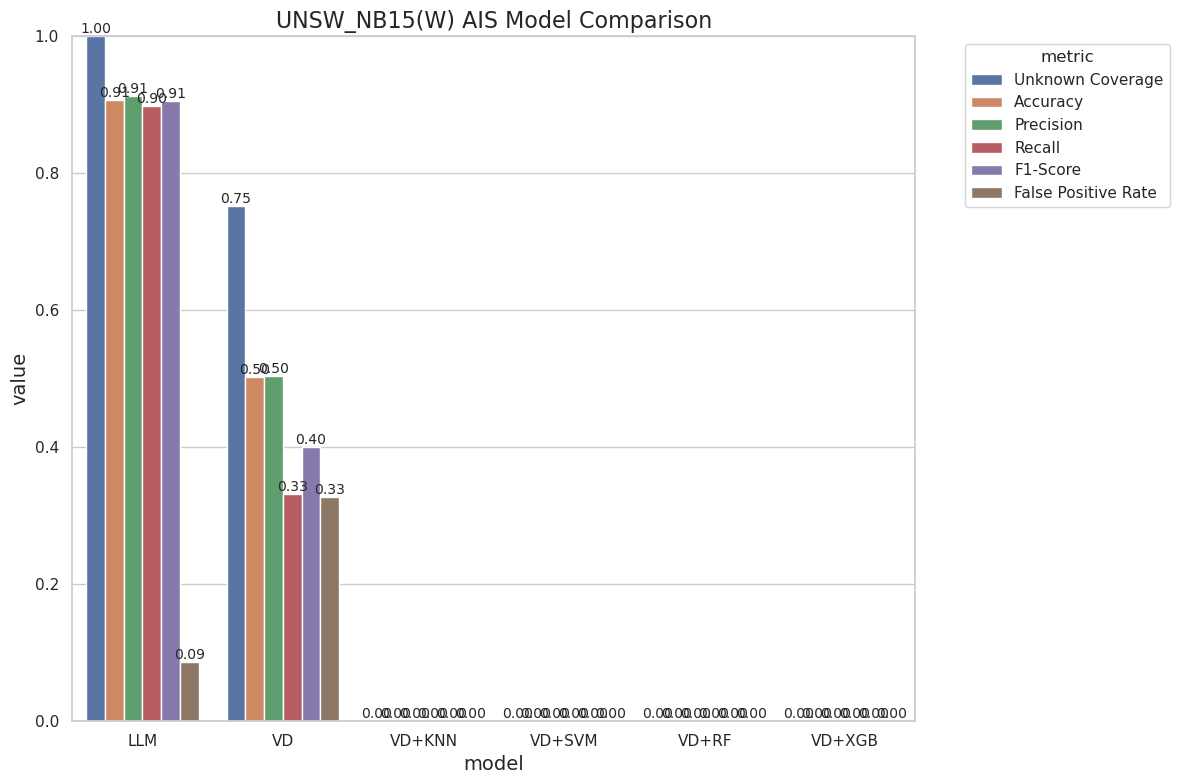

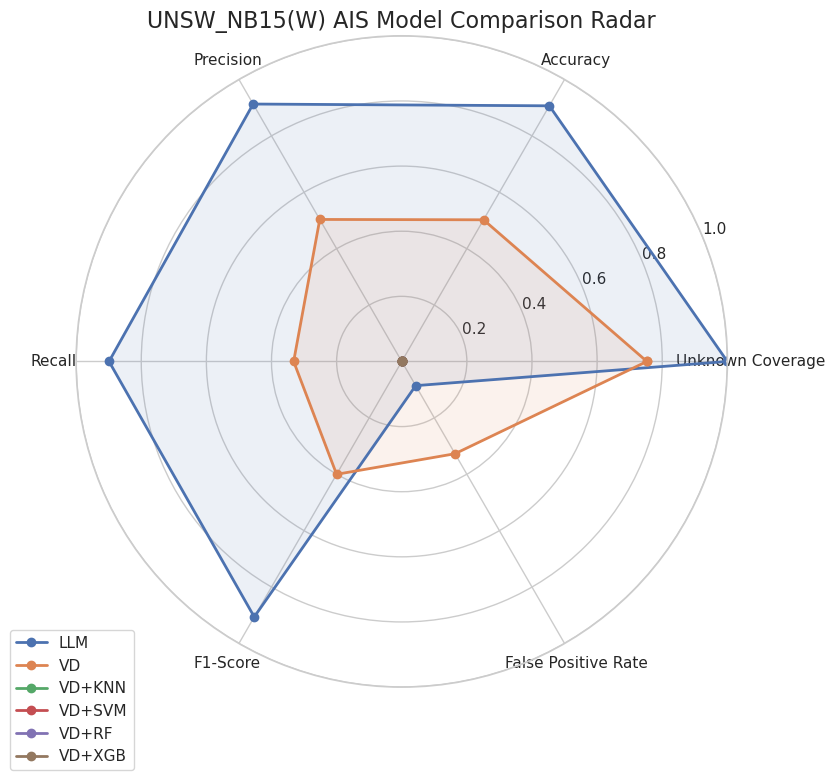

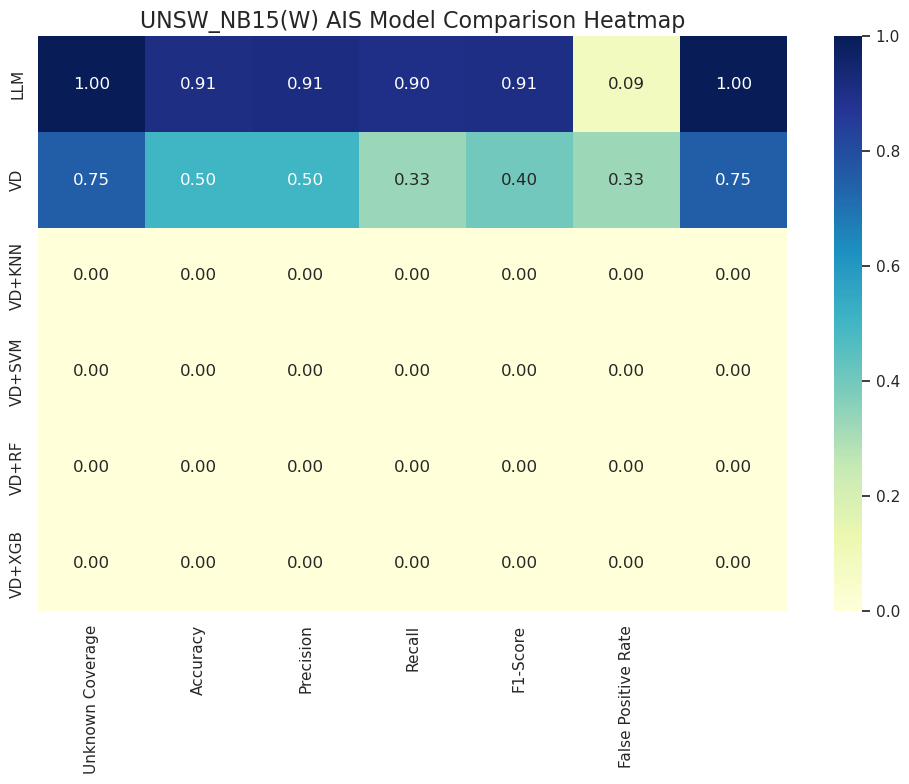

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def plot_model_comparison(models, metrics, values, title="Model Performance Comparison", figsize=(12, 8), save_path=None):
    """
    绘制不同模型各项指标的对比图
    
    参数:
    models: list, 模型名称列表
    metrics: list, 评估指标名称列表
    values: list of lists, 每个模型对应的各项指标值
    title: str, 图表标题
    figsize: tuple, 图表大小
    save_path: str, 保存路径，如果为None则不保存

    """
    # 创建DataFrame以便使用seaborn
    data = []
    for i, model in enumerate(models):
        for j, metric in enumerate(metrics):
            data.append({
                'model': model,
                'metric': metric,
                'value': values[i][j]
            })
    df = pd.DataFrame(data)
    
    # 设置样式
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    
    # 绘制条形图
    ax = sns.barplot(x='model', y='value', hue='metric', data=df)
    
    # 添加标题和标签
    plt.title(title, fontsize=16)
    plt.xlabel('model', fontsize=14)
    plt.ylabel('value', fontsize=14)
    plt.ylim(0, 1.0)  # 假设指标值在0-1之间
    
    # 在条形上方添加数值标签
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=10)
    
    # 调整图例位置
    plt.legend(title='metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    
    # 保存图表
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # plt.show()

def plot_model_comparison_radar(models, metrics, values, title="model performance radar chart", figsize=(10, 8), save_path=None):
    """
    绘制不同模型各项指标的雷达图对比
    
    参数:
    models: list, 模型名称列表
    metrics: list, 评估指标名称列表
    values: list of lists, 每个模型对应的各项指标值
    title: str, 图表标题
    figsize: tuple, 图表大小
    save_path: str, 保存路径，如果为None则不保存
    """
    # 设置图表
    plt.figure(figsize=figsize)
    
    # 计算雷达图的角度
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # 闭合雷达图
    
    # 设置极坐标图
    ax = plt.subplot(111, polar=True)
    
    # 添加每个模型的数据
    for i, model in enumerate(models):
        values_model = values[i]
        values_model += values_model[:1]  # 闭合雷达图
        ax.plot(angles, values_model, 'o-', linewidth=2, label=model)
        ax.fill(angles, values_model, alpha=0.1)
    
    # 设置刻度标签
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    
    # 设置y轴范围
    ax.set_ylim(0, 1)
    
    # 添加图例和标题
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(title, fontsize=16)
    
    plt.tight_layout()
    
    # 保存图表
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # plt.show()

def plot_model_comparison_heatmap(models, metrics, values, title="model performance heatmap", figsize=(10, 8), save_path=None):
    """
    绘制不同模型各项指标的热力图对比
    
    参数:
    models: list, 模型名称列表
    metrics: list, 评估指标名称列表
    values: list of lists, 每个模型对应的各项指标值
    title: str, 图表标题
    figsize: tuple, 图表大小
    save_path: str, 保存路径，如果为None则不保存
    """
    # 创建数据矩阵
    data_matrix = np.array(values)
    
    # 设置图表
    plt.figure(figsize=figsize)
    
    # 绘制热力图
    ax = sns.heatmap(data_matrix, annot=True, fmt=".2f", cmap="YlGnBu",
                     xticklabels=metrics, yticklabels=models, vmin=0, vmax=1)
    
    # 添加标题和标签
    plt.title(title, fontsize=16)
    plt.tight_layout()
    
    # 保存图表
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # plt.show()


# DL模型数据
dl_models = ['LLM', 'CNN+LSTM', 'RNN+LSTM', 'GRU+LSTM']
dl_values_A = [
    [1, 0.9048, 0.9051, 0.9044, 0.9048, 0.0948],  # LLM的各项指标
    [0.7789, 0.7885, 0.8403, 0.7124, 0.7711, 0.1354],  # CNN+LSTM的各项指标 
    [0.8446, 0.8530, 0.8529, 0.8532, 0.8530, 0.1472],  # RNN+LSTM的各项指标
    [0.9585, 0.8884, 0.9209, 0.8498, 0.8839, 0.0730]   # GRU+LSTM的各项指标
]
dl_values_B = [
    [0.9983, 0.8987, 0.9093, 0.8858, 0.8974, 0.0884],  # LLM的各项指标
    [0.8781, 0.7096, 0.7278, 0.6696, 0.6975, 0.2504],  # CNN+LSTM的各项指标 
    [0.9781, 0.8997, 0.8988, 0.9008, 0.8998, 0.1014],  # RNN+LSTM的各项指标
    [0.9592, 0.8172, 0.8658, 0.7508, 0.8042, 0.1164]   # GRU+LSTM的各项指标
]
dl_values_D = [
    [0.9819, 0.9024, 0.9118, 0.8910, 0.9013, 0.0862],  # LLM的各项指标
    [0.9717, 0.7598, 0.7445, 0.7910, 0.7671, 0.2714],  # CNN+LSTM的各项指标 
    [0.8669, 0.9015, 0.9398, 0.8580, 0.8970, 0.0550],  # RNN+LSTM的各项指标
    [0.8593, 0.8201, 0.8648, 0.7588, 0.8084, 0.1186]   # GRU+LSTM的各项指标
]
dl_values_E = [
    [0.8968, 0.9000, 0.9073, 0.8910, 0.8991, 0.0910],  # LLM的各项指标
    [0.0201, 0.5965, 0.8653, 0.2286, 0.3617, 0.0356],  # CNN+LSTM的各项指标 
    [0.4427, 0.8270, 0.8648, 0.7752, 0.8175, 0.1212],  # RNN+LSTM的各项指标
    [0.4131, 0.8136, 0.8538, 0.7568, 0.8024, 0.1296]   # GRU+LSTM的各项指标
]
dl_values_F = [
    [0.7494, 0.8987, 0.9151, 0.8790, 0.8967, 0.0816],  # LLM的各项指标
    [0.1713, 0.6162, 0.7364, 0.3620, 0.4854, 0.1296],  # CNN+LSTM的各项指标 
    [0.5483, 0.7814, 0.8593, 0.6730, 0.7548, 0.1102],  # RNN+LSTM的各项指标
    [0.5328, 0.8029, 0.9304, 0.6548, 0.7686, 0.0490]   # GRU+LSTM的各项指标
]
dl_values_G = [
    [0.9969, 0.9127, 0.9144, 0.9106, 0.9125, 0.0852],  # LLM的各项指标
    [0.9979, 0.8217, 0.8860, 0.7384, 0.8055, 0.0950],  # CNN+LSTM的各项指标 
    [0.9960, 0.8802, 0.9108, 0.8430, 0.8756, 0.0826],  # RNN+LSTM的各项指标
    [0.9928, 0.8762, 0.9474, 0.7966, 0.8655, 0.0442]   # GRU+LSTM的各项指标
]
dl_values_R = [
    [0.9233, 0.9125, 0.9141, 0.9106, 0.9123, 0.0856],  # LLM的各项指标
    [0.5821, 0.8221, 0.8263, 0.8156, 0.8209, 0.1714],  # CNN+LSTM的各项指标 
    [0.9895, 0.8700, 0.8777, 0.8598, 0.8687, 0.1198],  # RNN+LSTM的各项指标
    [0.9054, 0.9002, 0.9283, 0.8674, 0.8968, 0.0670]   # GRU+LSTM的各项指标
]
dl_values_S = [
    [1.0000, 0.9201, 0.9144, 0.9270, 0.9206, 0.0868],  # LLM的各项指标
    [0.6102, 0.8582, 0.8962, 0.8102, 0.8511, 0.0938],  # CNN+LSTM的各项指标 
    [0.4983, 0.8959, 0.9072, 0.8820, 0.8944, 0.0902],  # RNN+LSTM的各项指标
    [0.5169, 0.8890, 0.8815, 0.8988, 0.8901, 0.1208]   # GRU+LSTM的各项指标
]
dl_values_W = [
    [1.0000, 0.9066, 0.9129, 0.8990, 0.9059, 0.0858],  # LLM的各项指标
    [0.3736, 0.7936, 0.7918, 0.7966, 0.7942, 0.2094],  # CNN+LSTM的各项指标 
    [0.9828, 0.8627, 0.8798, 0.8402, 0.8595, 0.1148],  # RNN+LSTM的各项指标
    [0.9713, 0.8981, 0.8971, 0.8994, 0.8982, 0.1032]   # GRU+LSTM的各项指标
]

# ML模型数据
ml_models = ['LLM','SVM', 'Random Forest', 'XGBoost']
ml_values_A = [
    [1, 0.9048, 0.9051, 0.9044, 0.9048, 0.0948],  # LLM的各项指标
    [0.5921, 0.8088, 0.8907, 0.7040, 0.7864, 0.0864],  # SVM的各项指标
    [0.7662, 0.8865, 0.8808, 0.8940, 0.8873, 0.1210],  # Random Forest的各项指标
    [0.4886, 0.9001, 0.9573, 0.8376, 0.8934, 0.0374]   # XGBoost的各项指标
]
ml_values_B = [
    [0.9983, 0.8987, 0.9093, 0.8858, 0.8974, 0.0884],  # LLM的各项指标
    [0.3959, 0.5446, 0.5591, 0.4222, 0.4811, 0.3330],  # SVM的各项指标
    [0.8334, 0.9098, 0.9226, 0.8946, 0.9084, 0.0750],  # Random Forest的各项指标
    [0.5161, 0.8986, 0.9571, 0.8346, 0.8917, 0.0374]   # XGBoost的各项指标
]
ml_values_D = [
    [0.9819, 0.9024, 0.9118, 0.8910, 0.9013, 0.0862],  # LLM的各项指标
    [0.4245, 0.5551, 0.5785, 0.4062, 0.4773, 0.2960],  # SVM的各项指标
    [0.8430, 0.8585, 0.8726, 0.8396, 0.8558, 0.1226],  # Random Forest的各项指标
    [0.8147, 0.9000, 0.9572, 0.8374, 0.8933, 0.0374]   # XGBoost的各项指标
]
ml_values_E = [
    [0.8968, 0.9000, 0.9073, 0.8910, 0.8991, 0.0910],  # LLM的各项指标
    [0.6422, 0.8119, 0.7614, 0.9084, 0.8285, 0.2846],  # SVM的各项指标
    [0.3702, 0.8450, 0.8906, 0.7866, 0.8354, 0.0966],  # Random Forest的各项指标
    [0.3438, 0.8860, 0.9995, 0.7724, 0.8714, 0.0004]   # XGBoost的各项指标
]
ml_values_F = [
    [0.7494, 0.8987, 0.9151, 0.8790, 0.8967, 0.0816],  # LLM的各项指标
    [0.9277, 0.8351, 0.7669, 0.9628, 0.8538, 0.2926],  # SVM的各项指标
    [0.3606, 0.7680, 0.8432, 0.6584, 0.7394, 0.1224],  # Random Forest的各项指标
    [0.3228, 0.8862, 0.9995, 0.7728, 0.8716, 0.0004]   # XGBoost的各项指标
]
ml_values_G = [
    [0.9969, 0.9127, 0.9144, 0.9106, 0.9125, 0.0852],  # LLM的各项指标
    [0.0184, 0.6241, 0.7254, 0.3994, 0.5152, 0.1512],  # SVM的各项指标
    [0.9945, 0.8977, 0.8920, 0.9050, 0.8984, 0.1096],  # Random Forest的各项指标
    [0.9936, 0.9003, 0.9573, 0.8380, 0.8937, 0.0374]   # XGBoost的各项指标
]
ml_values_R = [
    [0.9233, 0.9125, 0.9141, 0.9106, 0.9123, 0.0856],  # LLM的各项指标
    [0.4140, 0.6241, 0.7254, 0.3994, 0.5152, 0.1512],  # SVM的各项指标
    [0.4985, 0.8977, 0.8920, 0.9050, 0.8984, 0.1096],  # Random Forest的各项指标
    [0.4738, 0.9003, 0.9573, 0.8380, 0.8937, 0.0374]   # XGBoost的各项指标
]
ml_values_S = [
    [1.0000, 0.9201, 0.9144, 0.9270, 0.9206, 0.0868],  # LLM的各项指标
    [0.4884, 0.6241, 0.7254, 0.3994, 0.5152, 0.1512],  # SVM的各项指标
    [0.0033, 0.8977, 0.8920, 0.9050, 0.8984, 0.1096],  # Random Forest的各项指标
    [0.0000, 0.9003, 0.9573, 0.8380, 0.8937, 0.0374]   # XGBoost的各项指标
]
ml_values_W = [
    [1.0000, 0.9066, 0.9129, 0.8990, 0.9059, 0.0858],  # LLM的各项指标
    [0.8448, 0.6241, 0.7254, 0.3994, 0.5152, 0.1512],  # SVM的各项指标
    [0.0977, 0.8977, 0.8920, 0.9050, 0.8984, 0.1096],  # Random Forest的各项指标
    [0.0000, 0.9003, 0.9573, 0.8380, 0.8937, 0.0374]   # XGBoost的各项指标
]

# AIS模型数据
als_model = ['LLM','VD', 'VD+KNN', 'VD+SVM', 'VD+RF', 'VD+XGB']
als_values_A = [
    [1, 0.9048, 0.9051, 0.9044, 0.9048, 0.0948],  # LLM的各项指标
    [0.2069, 0.5369, 0.8773, 0.0858, 0.1563, 0.0012],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_B = [
    [0.9983, 0.8987, 0.9093, 0.8858, 0.8974, 0.0884],  # LLM的各项指标
    [0.8536, 0.6660, 0.6613, 0.6806, 0.6708, 0.3486],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)

]
als_values_D = [
    [0.9819, 0.9024, 0.9118, 0.8910, 0.9013, 0.0862],  # LLM的各项指标
    [0.9063, 0.5797, 0.5605, 0.7388, 0.6374, 0.5794],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_E = [
    [0.8968, 0.9000, 0.9073, 0.8910, 0.8991, 0.0910],  # LLM的各项指标
    [0.1549, 0.6020, 0.7157, 0.3384, 0.4595, 0.1344],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_F = [
    [0.7494, 0.8987, 0.9151, 0.8790, 0.8967, 0.0816],  # LLM的各项指标
    [0.8753, 0.6119, 0.5704, 0.9070, 0.7003, 0.6832],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_G = [
    [0.9969, 0.9127, 0.9144, 0.9106, 0.9125, 0.0852],  # LLM的各项指标
    [0.9971, 0.5772, 0.5469, 0.9002, 0.6804, 0.7458],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_R = [
    [0.9233, 0.9125, 0.9141, 0.9106, 0.9123, 0.0856],  # LLM的各项指标
    [0.0749, 0.6101, 0.8469, 0.2688, 0.4081, 0.0486],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_S = [
    [1.0000, 0.9201, 0.9144, 0.9270, 0.9206, 0.0868],  # LLM的各项指标
    [0.5255, 0.5809, 0.5515, 0.8668, 0.6741, 0.7050],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_W = [
    [1.0000, 0.9066, 0.9129, 0.8990, 0.9059, 0.0858],  # LLM的各项指标
    [0.7529, 0.5024, 0.5036, 0.3320, 0.4002, 0.3272],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]

metrics = ['Unknown Coverage', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'False Positive Rate']

def plot_all_models(unknown_type):

    if unknown_type == 'A':
        dl_values = dl_values_A
        ml_values = ml_values_A
        als_values = als_values_A
    elif unknown_type == 'B':
        dl_values = dl_values_B
        ml_values = ml_values_B
        als_values = als_values_B
    elif unknown_type == 'D':
        dl_values = dl_values_D
        ml_values = ml_values_D
        als_values = als_values_D
    elif unknown_type == 'E':
        dl_values = dl_values_E
        ml_values = ml_values_E
        als_values = als_values_E
    elif unknown_type =='F':
        dl_values = dl_values_F
        ml_values = ml_values_F
        als_values = als_values_F
    elif unknown_type =='G':
        dl_values = dl_values_G
        ml_values = ml_values_G
        als_values = als_values_G
    elif unknown_type =='R':
        dl_values = dl_values_R
        ml_values = ml_values_R
        als_values = als_values_R
    elif unknown_type =='S':
        dl_values = dl_values_S
        ml_values = ml_values_S
        als_values = als_values_S
    elif unknown_type =='W':
        dl_values = dl_values_W
        ml_values = ml_values_W
        als_values = als_values_W

        
    # DL模型    
    plot_model_comparison(dl_models, metrics, dl_values, 
        title=f"UNSW_NB15({unknown_type}) DL Model Comparison", 
        save_path=f"bar/{unknown_type}_dl_model_comparison_bar.png")
    plot_model_comparison_radar(dl_models, metrics, dl_values,
        title=f"UNSW_NB15({unknown_type}) DL Model Comparison Radar",
        save_path=f"radar/{unknown_type}_dl_model_comparison_radar.png")
    plot_model_comparison_heatmap(dl_models, metrics, dl_values,
        title=f"UNSW_NB15({unknown_type}) DL Model Comparison Heatmap",
        save_path=f"heatmap/{unknown_type}_dl_model_comparison_heatmap.png")
    # ML模型
    plot_model_comparison(ml_models, metrics, ml_values,
        title=f"UNSW_NB15({unknown_type}) ML Model Comparison",
        save_path=f"bar/{unknown_type}_ml_model_comparison_bar.png")
    plot_model_comparison_radar(ml_models, metrics, ml_values,
        title=f"UNSW_NB15({unknown_type}) ML Model Comparison Radar",
        save_path=f"radar/{unknown_type}_ml_model_comparison_radar.png")
    plot_model_comparison_heatmap(ml_models, metrics, ml_values,
        title=f"UNSW_NB15({unknown_type}) ML Model Comparison Heatmap",
        save_path=f"heatmap/{unknown_type}_ml_model_comparison_heatmap.png")
    # AIS模型    
    plot_model_comparison(als_model, metrics, als_values,
        title=f"UNSW_NB15({unknown_type}) AIS Model Comparison",
        save_path=f"bar/{unknown_type}_ais_model_comparison_bar.png")
    plot_model_comparison_radar(als_model, metrics, als_values,
        title=f"UNSW_NB15({unknown_type}) AIS Model Comparison Radar",
        save_path=f"radar/{unknown_type}_ais_model_comparison_radar.png")
    plot_model_comparison_heatmap(als_model, metrics, als_values,
        title=f"UNSW_NB15({unknown_type}) AIS Model Comparison Heatmap",
        save_path=f"heatmap/{unknown_type}_ais_model_comparison_heatmap.png")


plot_all_models('A')
plot_all_models('B')
plot_all_models('D')
plot_all_models('E')
plot_all_models('F')
plot_all_models('G')
plot_all_models('R')
plot_all_models('S')
plot_all_models('W')
